In principle, the best way to create a phase diagram in DMRG should be point-wise.
However, this method is expensive.
A more efficient way is to derive the next point using the current point (perturbation-like).
Here we want to know which one is better: to begin with the 001 point or to begin with 111?

In [1]:
from kitaev_ladder_snake1 import run_atomic

In [23]:
from scipy.integrate import quad
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [2]:
from utility import linspace

## Generate the 001 starting files

In [11]:
N_pts = 201
J_min = 0
J_max = 2

J_list = linspace(J_min, J_max, N_pts)

# other parameters
Jz = 1.
chi = 64
verbose = 1

In [12]:
Jx = J_list[0]
Jy = Jx

result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=2, chi=chi, verbose=verbose)

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True 

In [9]:
import time

In [13]:
psi = result['psi']

result_list = [result]
time_list = [0]
initial_psi = psi.copy()

t0 = time.time()
for J in J_list[1:]:
    Jx = J
    Jy = J
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=2, initial_psi=initial_psi, chi=chi, verbose=verbose)
    result_list.append(result)
    initial_psi = result['psi'].copy()
    time_list.append(time.time() - t0)

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.01 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.01 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=Tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5001999400399946, S = nan, norm_err = 3.1e-13
Current memory usage 240.1 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3006e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [11, 14, 8, 14]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5001999400399626, S = nan, norm_err = 2.1e-13
Current memory usage 240.1 MB, time elapsed: 4.0 s
Delta E = 3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0926e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [14, 13, 10, 15]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2328: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

.......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5004496967047487, S = nan, norm_err = 4.5e-10
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4389e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [15, 17, 15, 15]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5004496967047096, S = nan, norm_err = 4.4e-10
Current memory usage 240.1 MB, time elapsed: 4.7 s
Delta E = 3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4857e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [15, 16, 17, 16]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/lanczos.py:250: UserWarning: Poorly conditioned Lanczos!
  warnings.warn("Poorly conditioned Lanczos!")


Updating environment
.....
sweep 30, age = 444
Energy = -0.5004496967047842, S = 0.7067816016690369, norm_err = 1.1e-02
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = -7.4607e-15, Delta S = nan (per sweep)
max_trunc_err = 2.5936e-22, max_E_trunc = 8.5265e-14
MPS bond dimensions: [10, 12, 10, 12]
Updating environment
.....
sweep 40, age = 564
Energy = -0.5004496967049050, S = 0.3922913979299787, norm_err = 1.0e-03
Current memory usage 240.1 MB, time elapsed: 7.4 s
Delta E = -1.2079e-14, Delta S = -3.1449e-02 (per sweep)
max_trunc_err = 2.5629e-22, max_E_trunc = 1.1369e-13
MPS bond dimensions: [9, 12, 9, 12]
Updating environment
.....
sweep 50, age = 684
Energy = -0.5004496967047132, S = 0.3476295515693757, norm_err = 8.0e-16
Current memory usage 240.1 MB, time elapsed: 8.2 s
Delta E = 1.9185e-14, Delta S = -4.4662e-03 (per sweep)
max_trunc_err = 2.1459e-21, max_E_trunc = 6.8212e-13
MPS bond dimensions: [5, 6, 5, 6]
Updating environment
.....
sweep 60, age = 804
Energy = -0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5007990425510993, S = nan, norm_err = 1.1e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2176e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [9, 9, 6, 7]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5007990425510656, S = nan, norm_err = 9.0e-15
Current memory usage 240.1 MB, time elapsed: 4.6 s
Delta E = 3.3751e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5305e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [8, 9, 6, 8]
Convergence criterium reached with enabled

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5012476659625680, S = nan, norm_err = 3.9e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0696e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [8, 9, 6, 9]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5012476659625733, S = nan, norm_err = 4.1e-14
Current memory usage 240.1 MB, time elapsed: 4.5 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7208e-21, max_E_trunc = 1.7053e-13
MPS bond dimensions: [8, 8, 6, 10]
Convergence criterium reached with enabl

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/lanczos.py:250: UserWarning: Poorly conditioned Lanczos!
  warnings.warn("Poorly conditioned Lanczos!")


Updating environment
.....
sweep 40, age = 564
Energy = -0.5012476659625875, S = 0.3491817114896283, norm_err = 2.0e-15
Current memory usage 240.1 MB, time elapsed: 7.4 s
Delta E = -9.9476e-15, Delta S = 1.2176e-12 (per sweep)
max_trunc_err = 9.9641e-21, max_E_trunc = 5.6843e-14
MPS bond dimensions: [6, 10, 11, 10]
DMRG finished after 40 sweeps.
total size = 564, maximum chi = 11
Before the canonicalization:
Bond dim =  [4, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+4.240556703503773e-17j)
After the canonicalization:
Bond dim =  [4, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5017951689324782, S = nan, norm_err = 1.3e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1677e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [9, 12, 7, 11]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5017951689324711, S = nan, norm_err = 3.3e-14
Current memory usage 240.1 MB, time elapsed: 4.4 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0771e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [10, 11, 7, 11]
Convergence criterium reached with en

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5024410690020940, S = nan, norm_err = 1.8e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7864e-21, max_E_trunc = 4.2633e-14
MPS bond dimensions: [8, 13, 9, 10]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5024410690021028, S = nan, norm_err = 2.0e-13
Current memory usage 240.1 MB, time elapsed: 4.4 s
Delta E = -8.8818e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5285e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [8, 12, 8, 11]
Convergence criterium reached with en

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5031848015825879, S = nan, norm_err = 4.7e-14
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1334e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [9, 11, 7, 12]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5031848015826235, S = nan, norm_err = 4.1e-14
Current memory usage 240.1 MB, time elapsed: 4.2 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1027e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [9, 11, 7, 10]
Convergence criterium reached with en

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5040257226328553, S = nan, norm_err = 9.1e-14
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5891e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [9, 12, 9, 12]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5040257226328677, S = nan, norm_err = 7.1e-14
Current memory usage 240.1 MB, time elapsed: 4.2 s
Delta E = -1.2434e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3176e-21, max_E_trunc = 2.2737e-13
MPS bond dimensions: [9, 11, 7, 11]
Convergence criterium reached with en

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5049631116635069, S = nan, norm_err = 2.0e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4975e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [11, 13, 10, 14]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5049631116634359, S = nan, norm_err = 7.2e-13
Current memory usage 240.1 MB, time elapsed: 4.4 s
Delta E = 7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4344e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [11, 11, 10, 13]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5059961750336708, S = nan, norm_err = 3.1e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9348e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [8, 13, 10, 11]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5059961750336761, S = nan, norm_err = 1.0e-13
Current memory usage 240.1 MB, time elapsed: 4.3 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0334e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [11, 14, 10, 12]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5071240495055811, S = nan, norm_err = 8.3e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2496e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [10, 12, 11, 12]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5071240495056770, S = nan, norm_err = 2.3e-13
Current memory usage 240.1 MB, time elapsed: 4.3 s
Delta E = -9.5923e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0024e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [11, 12, 8, 13]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5083458060192250, S = nan, norm_err = 2.6e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9715e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [10, 13, 8, 13]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5083458060192463, S = nan, norm_err = 1.6e-13
Current memory usage 240.1 MB, time elapsed: 4.4 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2965e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [12, 13, 9, 12]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5096604536495271, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0007e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [11, 12, 9, 13]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5096604536495555, S = nan, norm_err = 3.5e-13
Current memory usage 240.1 MB, time elapsed: 4.3 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0117e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [10, 14, 9, 13]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5110669437090714, S = nan, norm_err = 3.9e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7076e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [11, 12, 12, 12]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5110669437090785, S = nan, norm_err = 3.5e-13
Current memory usage 240.1 MB, time elapsed: 4.3 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9138e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [12, 12, 10, 12]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5125641739570721, S = nan, norm_err = 2.8e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3176e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [11, 13, 10, 13]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5125641739570703, S = nan, norm_err = 3.3e-13
Current memory usage 240.1 MB, time elapsed: 4.4 s
Delta E = 1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0390e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [12, 13, 9, 15]
Convergence criterium reached with 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5141509928789194, S = nan, norm_err = 9.1e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0303e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [12, 16, 11, 15]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5141509928790100, S = nan, norm_err = 5.1e-13
Current memory usage 240.1 MB, time elapsed: 4.5 s
Delta E = -9.0594e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9654e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [14, 13, 11, 14]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5158262040015149, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7875e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [12, 15, 10, 15]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5158262040015273, S = nan, norm_err = 1.7e-13
Current memory usage 240.1 MB, time elapsed: 4.5 s
Delta E = -1.2434e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4029e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [12, 14, 12, 15]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5175885702092060, S = nan, norm_err = 1.7e-12
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8222e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [12, 15, 9, 15]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5175885702092664, S = nan, norm_err = 5.8e-13
Current memory usage 240.1 MB, time elapsed: 4.5 s
Delta E = -6.0396e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5539e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [12, 14, 11, 15]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5194368180317195, S = nan, norm_err = 1.6e-13
Current memory usage 240.1 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8439e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [14, 15, 12, 12]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5194368180317142, S = nan, norm_err = 9.6e-14
Current memory usage 240.1 MB, time elapsed: 4.6 s
Delta E = 5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9067e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [13, 16, 10, 15]
Convergence criterium reached with

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5213696418728802, S = nan, norm_err = 1.0e-12
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8917e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [13, 16, 11, 15]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5213696418729548, S = nan, norm_err = 4.8e-13
Current memory usage 240.1 MB, time elapsed: 4.6 s
Delta E = -7.4607e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4316e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [14, 14, 11, 14]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5233857081563826, S = nan, norm_err = 1.4e-12
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5426e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [15, 18, 10, 17]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5233857081563897, S = nan, norm_err = 9.9e-13
Current memory usage 240.1 MB, time elapsed: 4.6 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7227e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [13, 17, 13, 16]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5254836593641325, S = nan, norm_err = 2.0e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3393e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [17, 20, 14, 18]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5254836593641841, S = nan, norm_err = 3.2e-13
Current memory usage 240.1 MB, time elapsed: 4.7 s
Delta E = -5.1514e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0181e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [14, 18, 13, 16]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5276621179474077, S = nan, norm_err = 1.6e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8982e-21, max_E_trunc = 7.1054e-14
MPS bond dimensions: [19, 17, 14, 19]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5276621179474397, S = nan, norm_err = 3.8e-13
Current memory usage 240.1 MB, time elapsed: 4.9 s
Delta E = -3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3332e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [16, 19, 13, 18]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5299196900938039, S = nan, norm_err = 6.2e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4714e-20, max_E_trunc = 1.2790e-13
MPS bond dimensions: [15, 18, 15, 15]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5299196900938661, S = nan, norm_err = 4.4e-13
Current memory usage 240.1 MB, time elapsed: 4.8 s
Delta E = -6.2172e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5047e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [16, 17, 11, 19]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5322549693355079, S = nan, norm_err = 6.5e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8971e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [17, 19, 14, 17]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5322549693355256, S = nan, norm_err = 5.5e-13
Current memory usage 240.1 MB, time elapsed: 4.7 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4669e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [15, 17, 14, 19]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5346665399870378, S = nan, norm_err = 4.3e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1333e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [16, 17, 11, 16]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5346665399869082, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 4.7 s
Delta E = 1.2967e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9173e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [15, 19, 13, 19]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5371529804037642, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3066e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [17, 18, 12, 18]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5371529804037394, S = nan, norm_err = 4.8e-13
Current memory usage 240.1 MB, time elapsed: 4.9 s
Delta E = 2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8878e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [18, 19, 13, 20]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5397128660552752, S = nan, norm_err = 9.4e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8222e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [16, 20, 12, 18]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5397128660553641, S = nan, norm_err = 7.8e-13
Current memory usage 240.1 MB, time elapsed: 4.9 s
Delta E = -8.8818e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7281e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [18, 17, 14, 20]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5423447724079367, S = nan, norm_err = 2.1e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1969e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [19, 21, 17, 22]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5423447724080397, S = nan, norm_err = 6.6e-13
Current memory usage 240.1 MB, time elapsed: 4.9 s
Delta E = -1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7049e-20, max_E_trunc = 3.6948e-13
MPS bond dimensions: [16, 19, 12, 19]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5450472776165984, S = nan, norm_err = 9.5e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5608e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [20, 21, 15, 19]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5450472776166784, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 4.8 s
Delta E = -7.9936e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9255e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [18, 20, 15, 19]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5478189650238949, S = nan, norm_err = 6.0e-13
Current memory usage 240.1 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0957e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [16, 21, 14, 19]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5478189650240317, S = nan, norm_err = 1.4e-12
Current memory usage 240.1 MB, time elapsed: 4.8 s
Delta E = -1.3678e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5171e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [19, 22, 17, 22]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5506584254688693, S = nan, norm_err = 3.3e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0438e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [18, 22, 19, 22]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5506584254690274, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 4.9 s
Delta E = -1.5810e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7139e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [19, 21, 17, 22]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5535642594090415, S = nan, norm_err = 4.2e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4340e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [21, 22, 17, 20]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5535642594089367, S = nan, norm_err = 1.8e-12
Current memory usage 240.1 MB, time elapsed: 4.9 s
Delta E = 1.0481e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1707e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [21, 23, 18, 21]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5565350788580830, S = nan, norm_err = 6.2e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9457e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [21, 24, 20, 22]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5565350788581753, S = nan, norm_err = 3.4e-13
Current memory usage 240.1 MB, time elapsed: 5.0 s
Delta E = -9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5356e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [20, 22, 16, 22]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5595695091476109, S = nan, norm_err = 4.3e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0071e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [22, 22, 17, 21]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5595695091476927, S = nan, norm_err = 3.6e-13
Current memory usage 240.1 MB, time elapsed: 5.0 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7760e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [19, 23, 18, 23]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5626661905153263, S = nan, norm_err = 6.0e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9410e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [21, 26, 15, 25]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5626661905152943, S = nan, norm_err = 7.2e-13
Current memory usage 240.1 MB, time elapsed: 5.0 s
Delta E = 3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4400e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [22, 25, 18, 23]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5658237795301115, S = nan, norm_err = 7.3e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7288e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [24, 27, 18, 22]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5658237795300955, S = nan, norm_err = 9.8e-13
Current memory usage 240.1 MB, time elapsed: 5.0 s
Delta E = 1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4079e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [23, 25, 16, 25]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5690409503594047, S = nan, norm_err = 1.9e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4844e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [25, 26, 17, 24]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5690409503594474, S = nan, norm_err = 5.5e-13
Current memory usage 240.1 MB, time elapsed: 5.0 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2899e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [23, 27, 17, 25]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5723163958872917, S = nan, norm_err = 1.8e-13
Current memory usage 240.1 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4996e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [23, 29, 17, 25]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5723163958873521, S = nan, norm_err = 1.8e-12
Current memory usage 240.1 MB, time elapsed: 5.0 s
Delta E = -6.0396e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1694e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [22, 28, 17, 29]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5756488286916603, S = nan, norm_err = 4.6e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2217e-20, max_E_trunc = 1.2790e-13
MPS bond dimensions: [23, 27, 17, 24]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5756488286917723, S = nan, norm_err = 1.4e-12
Current memory usage 240.1 MB, time elapsed: 5.2 s
Delta E = -1.1191e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5698e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [24, 27, 17, 29]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5790369818881445, S = nan, norm_err = 1.4e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4176e-20, max_E_trunc = 1.2790e-13
MPS bond dimensions: [24, 25, 18, 25]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5790369818880947, S = nan, norm_err = 1.9e-13
Current memory usage 240.1 MB, time elapsed: 5.3 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6968e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [22, 26, 17, 25]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5824796098497167, S = nan, norm_err = 4.8e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3146e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [24, 27, 18, 26]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5824796098497593, S = nan, norm_err = 1.5e-13
Current memory usage 240.1 MB, time elapsed: 5.2 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9807e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [23, 29, 15, 25]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5859754888100674, S = nan, norm_err = 1.5e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7187e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [24, 26, 16, 26]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5859754888099609, S = nan, norm_err = 2.1e-13
Current memory usage 240.1 MB, time elapsed: 5.2 s
Delta E = 1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5267e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [24, 27, 18, 27]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5895234173586363, S = nan, norm_err = 6.1e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8364e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [25, 29, 18, 30]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5895234173586061, S = nan, norm_err = 1.0e-12
Current memory usage 240.1 MB, time elapsed: 5.2 s
Delta E = 3.0198e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7728e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [24, 29, 17, 24]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5931222168352708, S = nan, norm_err = 2.6e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5666e-20, max_E_trunc = 1.5632e-13
MPS bond dimensions: [24, 27, 17, 26]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5931222168353969, S = nan, norm_err = 5.3e-13
Current memory usage 240.1 MB, time elapsed: 5.2 s
Delta E = -1.2612e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3912e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [24, 27, 17, 27]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.5967707316332636, S = nan, norm_err = 6.7e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7157e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [26, 29, 17, 31]
Updating environment
.....
sweep 20, age = 324
Energy = -0.5967707316333701, S = nan, norm_err = 3.1e-13
Current memory usage 240.1 MB, time elapsed: 5.3 s
Delta E = -1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5038e-20, max_E_trunc = 4.2633e-13
MPS bond dimensions: [26, 28, 20, 27]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6004678294161891, S = nan, norm_err = 5.7e-13
Current memory usage 240.1 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8163e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [27, 30, 19, 30]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6004678294162176, S = nan, norm_err = 5.9e-13
Current memory usage 240.1 MB, time elapsed: 5.3 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6016e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [23, 30, 18, 28]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6042124012582484, S = nan, norm_err = 2.6e-13
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3267e-20, max_E_trunc = 1.2790e-13
MPS bond dimensions: [27, 32, 20, 32]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6042124012582661, S = nan, norm_err = 6.2e-13
Current memory usage 240.1 MB, time elapsed: 5.4 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6001e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [28, 30, 20, 32]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6080033617125302, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5208e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [28, 31, 19, 30]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6080033617124698, S = nan, norm_err = 5.3e-13
Current memory usage 240.1 MB, time elapsed: 5.5 s
Delta E = 6.0396e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3819e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [26, 30, 18, 32]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6118396488158524, S = nan, norm_err = 1.8e-12
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3202e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [28, 32, 19, 31]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6118396488158737, S = nan, norm_err = 9.6e-13
Current memory usage 240.1 MB, time elapsed: 5.5 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6585e-20, max_E_trunc = 3.6948e-13
MPS bond dimensions: [26, 29, 20, 27]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6157202240345825, S = nan, norm_err = 7.5e-13
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4711e-20, max_E_trunc = 1.8474e-13
MPS bond dimensions: [27, 31, 20, 33]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6157202240346109, S = nan, norm_err = 4.5e-13
Current memory usage 240.1 MB, time elapsed: 5.5 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5418e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [27, 29, 18, 33]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6196440721583425, S = nan, norm_err = 3.4e-13
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5846e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [29, 32, 20, 32]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6196440721582768, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 5.5 s
Delta E = 6.5725e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.7603e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [26, 29, 19, 31]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6236102011467040, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1009e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [29, 34, 22, 32]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6236102011467430, S = nan, norm_err = 7.2e-13
Current memory usage 240.1 MB, time elapsed: 5.6 s
Delta E = -3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7009e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [28, 32, 22, 32]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6276176419335417, S = nan, norm_err = 6.4e-13
Current memory usage 240.1 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3515e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [32, 34, 20, 35]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6276176419335364, S = nan, norm_err = 1.6e-13
Current memory usage 240.1 MB, time elapsed: 5.7 s
Delta E = 5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8991e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [27, 31, 22, 33]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6316654481951005, S = nan, norm_err = 4.3e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2802e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [32, 37, 21, 37]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6316654481951005, S = nan, norm_err = 1.0e-13
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8016e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [29, 35, 23, 34]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6357526960840936, S = nan, norm_err = 9.5e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4272e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [32, 38, 22, 37]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6357526960840403, S = nan, norm_err = 3.0e-13
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = 5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8056e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [29, 35, 22, 34]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6398784839363234, S = nan, norm_err = 6.1e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1921e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [30, 37, 24, 37]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6398784839362364, S = nan, norm_err = 7.1e-13
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = 8.7041e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1334e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [30, 36, 23, 37]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6440419319514223, S = nan, norm_err = 2.9e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9093e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [31, 36, 20, 37]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6440419319515804, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 5.7 s
Delta E = -1.5810e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1464e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [30, 38, 24, 38]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6482421818530923, S = nan, norm_err = 6.9e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2611e-20, max_E_trunc = 1.2790e-13
MPS bond dimensions: [31, 39, 24, 37]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6482421818529431, S = nan, norm_err = 4.4e-13
Current memory usage 240.1 MB, time elapsed: 5.7 s
Delta E = 1.4921e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8686e-20, max_E_trunc = 3.6948e-13
MPS bond dimensions: [31, 36, 22, 36]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6524783965298386, S = nan, norm_err = 7.6e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5755e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [33, 35, 22, 36]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6524783965298759, S = nan, norm_err = 1.6e-12
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = -3.7303e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7342e-20, max_E_trunc = 3.1264e-13
MPS bond dimensions: [31, 38, 23, 38]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6567497596620839, S = nan, norm_err = 1.5e-12
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.9198e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [31, 39, 25, 38]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6567497596619347, S = nan, norm_err = 1.6e-12
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = 1.4921e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2342e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [31, 39, 22, 38]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6610554753348978, S = nan, norm_err = 6.0e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4882e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [35, 39, 23, 36]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6610554753348836, S = nan, norm_err = 1.7e-12
Current memory usage 240.1 MB, time elapsed: 5.8 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4562e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [33, 37, 23, 39]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6653947676419705, S = nan, norm_err = 3.6e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6247e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [34, 39, 22, 38]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6653947676420202, S = nan, norm_err = 1.5e-12
Current memory usage 240.1 MB, time elapsed: 5.9 s
Delta E = -4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9843e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [32, 37, 23, 40]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6697668802806902, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2320e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [33, 40, 22, 39]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6697668802806689, S = nan, norm_err = 3.9e-13
Current memory usage 240.1 MB, time elapsed: 5.9 s
Delta E = 2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3494e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [32, 38, 23, 38]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6741710761410395, S = nan, norm_err = 1.8e-12
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0223e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [38, 42, 23, 40]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6741710761410253, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 6.0 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3490e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [34, 38, 23, 41]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6786066368920949, S = nan, norm_err = 4.7e-13
Current memory usage 240.1 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3404e-20, max_E_trunc = 9.9476e-14
MPS bond dimensions: [36, 39, 22, 39]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6786066368919954, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 6.0 s
Delta E = 9.9476e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0940e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [35, 41, 25, 40]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6830728625628915, S = nan, norm_err = 6.4e-13
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2710e-20, max_E_trunc = 1.5632e-13
MPS bond dimensions: [35, 41, 26, 40]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6830728625629447, S = nan, norm_err = 3.6e-13
Current memory usage 240.1 MB, time elapsed: 6.1 s
Delta E = -5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1949e-20, max_E_trunc = 4.5475e-13
MPS bond dimensions: [36, 39, 22, 39]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6875690711252034, S = nan, norm_err = 1.5e-12
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8996e-20, max_E_trunc = 2.1316e-13
MPS bond dimensions: [36, 42, 25, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6875690711251963, S = nan, norm_err = 7.0e-13
Current memory usage 240.1 MB, time elapsed: 6.1 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9764e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [34, 40, 25, 41]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6920945980740711, S = nan, norm_err = 1.9e-12
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6713e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [37, 42, 28, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6920945980741351, S = nan, norm_err = 4.9e-13
Current memory usage 240.1 MB, time elapsed: 6.1 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9084e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [32, 41, 25, 40]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.6966487960120489, S = nan, norm_err = 1.7e-12
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0822e-19, max_E_trunc = 2.1316e-13
MPS bond dimensions: [37, 43, 27, 46]
Updating environment
.....
sweep 20, age = 324
Energy = -0.6966487960120702, S = nan, norm_err = 9.8e-13
Current memory usage 240.1 MB, time elapsed: 6.2 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1529e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [33, 42, 28, 41]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7012310342329435, S = nan, norm_err = 9.3e-13
Current memory usage 240.1 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1479e-19, max_E_trunc = 2.9843e-13
MPS bond dimensions: [38, 41, 25, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7012310342330466, S = nan, norm_err = 5.3e-13
Current memory usage 240.1 MB, time elapsed: 6.2 s
Delta E = -1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6006e-19, max_E_trunc = 1.9895e-13
MPS bond dimensions: [38, 43, 25, 42]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7058406983117536, S = nan, norm_err = 8.4e-13
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0003e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [39, 42, 26, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7058406983117109, S = nan, norm_err = 9.3e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7835e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [36, 41, 27, 44]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7104771896963804, S = nan, norm_err = 1.4e-12
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1704e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [39, 43, 28, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7104771896964870, S = nan, norm_err = 4.9e-14
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6304e-20, max_E_trunc = 3.9790e-13
MPS bond dimensions: [37, 41, 27, 42]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7151399253055786, S = nan, norm_err = 7.4e-13
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0741e-20, max_E_trunc = 2.4158e-13
MPS bond dimensions: [40, 43, 26, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7151399253054755, S = nan, norm_err = 4.1e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0178e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [37, 42, 27, 44]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7198283371310765, S = nan, norm_err = 4.8e-13
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.3548e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [40, 46, 26, 44]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7198283371311831, S = nan, norm_err = 2.3e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6145e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [37, 43, 28, 43]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7245418718466397, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0530e-19, max_E_trunc = 1.5632e-13
MPS bond dimensions: [38, 44, 28, 44]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7245418718467462, S = nan, norm_err = 1.8e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4569e-20, max_E_trunc = 5.9686e-13
MPS bond dimensions: [38, 41, 25, 42]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7292799904226932, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.5023e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [43, 47, 29, 45]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7292799904226683, S = nan, norm_err = 8.4e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7856e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [39, 45, 26, 44]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7340421677478126, S = nan, norm_err = 6.4e-13
Current memory usage 240.1 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3494e-19, max_E_trunc = 1.5632e-13
MPS bond dimensions: [41, 45, 29, 46]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7340421677478304, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5261e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [38, 48, 29, 44]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7388278922572553, S = nan, norm_err = 3.5e-13
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9101e-19, max_E_trunc = 1.2790e-13
MPS bond dimensions: [44, 49, 25, 48]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7388278922573406, S = nan, norm_err = 8.3e-13
Current memory usage 240.1 MB, time elapsed: 6.7 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7114e-19, max_E_trunc = 2.8422e-13
MPS bond dimensions: [37, 48, 28, 45]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7436366655695110, S = nan, norm_err = 2.6e-13
Current memory usage 240.1 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0240e-19, max_E_trunc = 7.1054e-14
MPS bond dimensions: [43, 48, 29, 46]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7436366655695110, S = nan, norm_err = 7.0e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8321e-19, max_E_trunc = 5.1159e-13
MPS bond dimensions: [41, 50, 28, 47]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7484680021276588, S = nan, norm_err = 2.9e-13
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7479e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [44, 49, 30, 49]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7484680021277299, S = nan, norm_err = 1.0e-12
Current memory usage 240.1 MB, time elapsed: 6.6 s
Delta E = -7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0471e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [40, 48, 30, 47]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7533214288521748, S = nan, norm_err = 7.5e-13
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3014e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [44, 50, 30, 48]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7533214288521677, S = nan, norm_err = 2.2e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6218e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [42, 47, 29, 47]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7581964847980984, S = nan, norm_err = 5.9e-13
Current memory usage 240.1 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4417e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [43, 50, 28, 49]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7581964847980487, S = nan, norm_err = 4.0e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3292e-19, max_E_trunc = 0.0000e+00
MPS bond dimensions: [43, 51, 28, 47]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7630927208216995, S = nan, norm_err = 9.5e-14
Current memory usage 240.1 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7022e-19, max_E_trunc = 2.8422e-14
MPS bond dimensions: [45, 51, 31, 47]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7630927208216960, S = nan, norm_err = 3.8e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6786e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [41, 50, 29, 49]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7680096992547369, S = nan, norm_err = 2.2e-13
Current memory usage 240.1 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2589e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [45, 49, 29, 48]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7680096992548293, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8542e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [43, 51, 30, 48]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7729469935864088, S = nan, norm_err = 2.0e-13
Current memory usage 240.1 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0646e-18, max_E_trunc = 9.9476e-14
MPS bond dimensions: [43, 50, 28, 51]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7729469935864124, S = nan, norm_err = 2.2e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8579e-19, max_E_trunc = 5.9686e-13
MPS bond dimensions: [41, 49, 27, 47]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7779041881525259, S = nan, norm_err = 2.8e-13
Current memory usage 240.1 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8864e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [45, 51, 32, 51]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7779041881526112, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 6.6 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5711e-19, max_E_trunc = 4.2633e-13
MPS bond dimensions: [40, 50, 30, 49]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7828808778340175, S = nan, norm_err = 2.9e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0193e-18, max_E_trunc = 7.1054e-14
MPS bond dimensions: [45, 50, 30, 49]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7828808778340033, S = nan, norm_err = 2.2e-13
Current memory usage 240.1 MB, time elapsed: 6.6 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.7504e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [42, 50, 30, 49]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7878766677612283, S = nan, norm_err = 4.5e-13
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5750e-18, max_E_trunc = 1.5632e-13
MPS bond dimensions: [47, 51, 32, 52]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7878766677613314, S = nan, norm_err = 7.3e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3327e-19, max_E_trunc = 3.6948e-13
MPS bond dimensions: [43, 51, 31, 50]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7928911730281953, S = nan, norm_err = 1.0e-12
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1711e-18, max_E_trunc = 2.2737e-13
MPS bond dimensions: [48, 53, 32, 52]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7928911730282024, S = nan, norm_err = 4.7e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0456e-19, max_E_trunc = 3.6948e-13
MPS bond dimensions: [42, 52, 30, 51]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.7979240184119440, S = nan, norm_err = 1.3e-12
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7270e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [47, 53, 32, 53]
Updating environment
.....
sweep 20, age = 324
Energy = -0.7979240184119263, S = nan, norm_err = 9.0e-13
Current memory usage 240.1 MB, time elapsed: 6.9 s
Delta E = 1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1935e-18, max_E_trunc = 1.7053e-13
MPS bond dimensions: [46, 54, 33, 55]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8029748381016439, S = nan, norm_err = 7.8e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0816e-18, max_E_trunc = 1.4211e-14
MPS bond dimensions: [48, 52, 32, 53]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8029748381015125, S = nan, norm_err = 3.0e-12
Current memory usage 240.1 MB, time elapsed: 6.9 s
Delta E = 1.3145e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4183e-18, max_E_trunc = 2.2737e-13
MPS bond dimensions: [45, 54, 35, 56]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8080432754329578, S = nan, norm_err = 8.3e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2145e-18, max_E_trunc = 1.7053e-13
MPS bond dimensions: [47, 55, 33, 53]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8080432754331284, S = nan, norm_err = 3.6e-13
Current memory usage 240.1 MB, time elapsed: 6.9 s
Delta E = -1.7053e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5281e-18, max_E_trunc = 2.5580e-13
MPS bond dimensions: [44, 54, 33, 55]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8131289826325379, S = nan, norm_err = 1.7e-12
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3981e-18, max_E_trunc = 2.2737e-13
MPS bond dimensions: [49, 56, 34, 55]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8131289826326231, S = nan, norm_err = 1.6e-12
Current memory usage 240.1 MB, time elapsed: 6.8 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9777e-18, max_E_trunc = 3.9790e-13
MPS bond dimensions: [45, 56, 34, 58]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8182316205658360, S = nan, norm_err = 2.1e-12
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7757e-18, max_E_trunc = 3.4106e-13
MPS bond dimensions: [50, 55, 34, 55]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8182316205658040, S = nan, norm_err = 6.9e-13
Current memory usage 240.1 MB, time elapsed: 6.8 s
Delta E = 3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7249e-18, max_E_trunc = 5.1159e-13
MPS bond dimensions: [46, 55, 32, 54]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8233508584961697, S = nan, norm_err = 2.6e-12
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9713e-18, max_E_trunc = 3.1264e-13
MPS bond dimensions: [49, 55, 32, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8233508584960987, S = nan, norm_err = 9.9e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = 7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9750e-18, max_E_trunc = 4.2633e-13
MPS bond dimensions: [47, 54, 32, 57]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8284863738458625, S = nan, norm_err = 9.9e-13
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9044e-18, max_E_trunc = 1.4211e-13
MPS bond dimensions: [50, 58, 35, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8284863738460473, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = -1.8474e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7412e-18, max_E_trunc = 8.5265e-14
MPS bond dimensions: [45, 54, 33, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8336378519702023, S = nan, norm_err = 8.3e-13
Current memory usage 240.1 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0807e-18, max_E_trunc = 8.5265e-14
MPS bond dimensions: [51, 54, 35, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8336378519700887, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = 1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0751e-18, max_E_trunc = 2.8422e-13
MPS bond dimensions: [48, 55, 33, 56]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388049859311337, S = nan, norm_err = 3.8e-13
Current memory usage 240.1 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6765e-18, max_E_trunc = 1.9895e-13
MPS bond dimensions: [51, 55, 34, 53]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388049859311124, S = nan, norm_err = 1.5e-12
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = 2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5851e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [47, 56, 38, 57]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8439874762831394, S = nan, norm_err = 1.0e-12
Current memory usage 240.1 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7192e-18, max_E_trunc = 2.5580e-13
MPS bond dimensions: [51, 58, 34, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8439874762831607, S = nan, norm_err = 1.2e-12
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3953e-18, max_E_trunc = 4.2633e-13
MPS bond dimensions: [45, 56, 34, 54]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8491850308621061, S = nan, norm_err = 6.3e-13
Current memory usage 240.1 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0897e-17, max_E_trunc = 1.9895e-13
MPS bond dimensions: [53, 59, 34, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8491850308621807, S = nan, norm_err = 7.6e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = -7.4607e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2424e-18, max_E_trunc = 1.4211e-13
MPS bond dimensions: [48, 55, 34, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8543973645814376, S = nan, norm_err = 2.9e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1504e-17, max_E_trunc = 1.1369e-13
MPS bond dimensions: [53, 58, 35, 59]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8543973645815299, S = nan, norm_err = 9.0e-13
Current memory usage 240.1 MB, time elapsed: 6.6 s
Delta E = -9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1697e-18, max_E_trunc = 4.8317e-13
MPS bond dimensions: [50, 57, 34, 58]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8596241992338705, S = nan, norm_err = 5.8e-13
Current memory usage 240.1 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5121e-17, max_E_trunc = 1.1369e-13
MPS bond dimensions: [52, 60, 36, 61]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8596241992338776, S = nan, norm_err = 3.2e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9933e-18, max_E_trunc = 4.2633e-13
MPS bond dimensions: [51, 58, 37, 56]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8648652632992935, S = nan, norm_err = 6.1e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8972e-17, max_E_trunc = 8.5265e-14
MPS bond dimensions: [55, 61, 35, 60]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8648652632993716, S = nan, norm_err = 1.3e-12
Current memory usage 240.1 MB, time elapsed: 6.6 s
Delta E = -7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5967e-18, max_E_trunc = 1.1369e-13
MPS bond dimensions: [50, 59, 36, 60]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8701202917584396, S = nan, norm_err = 6.9e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6526e-17, max_E_trunc = 1.4211e-13
MPS bond dimensions: [53, 63, 36, 62]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8701202917585249, S = nan, norm_err = 5.8e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5796e-17, max_E_trunc = 2.8422e-13
MPS bond dimensions: [51, 58, 36, 60]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8753890259112822, S = nan, norm_err = 1.0e-12
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9149e-17, max_E_trunc = 5.6843e-14
MPS bond dimensions: [58, 64, 38, 63]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8753890259114812, S = nan, norm_err = 9.0e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.9895e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2630e-17, max_E_trunc = 5.6843e-13
MPS bond dimensions: [54, 62, 39, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8806712132023087, S = nan, norm_err = 4.9e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2933e-17, max_E_trunc = 1.9895e-13
MPS bond dimensions: [54, 64, 39, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8806712132024188, S = nan, norm_err = 8.3e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = -1.1013e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9795e-17, max_E_trunc = 3.4106e-13
MPS bond dimensions: [51, 63, 36, 62]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8859666070488785, S = nan, norm_err = 6.0e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7497e-17, max_E_trunc = 2.2737e-13
MPS bond dimensions: [57, 64, 40, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8859666070488998, S = nan, norm_err = 9.6e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1596e-17, max_E_trunc = 3.1264e-13
MPS bond dimensions: [50, 62, 38, 63]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8912749666766260, S = nan, norm_err = 3.1e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0521e-17, max_E_trunc = 1.9895e-13
MPS bond dimensions: [58, 64, 40, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8912749666768391, S = nan, norm_err = 9.7e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -2.1316e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2863e-17, max_E_trunc = 4.5475e-13
MPS bond dimensions: [53, 63, 39, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8965960569594209, S = nan, norm_err = 1.8e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0918e-17, max_E_trunc = 1.9895e-13
MPS bond dimensions: [58, 64, 40, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8965960569592468, S = nan, norm_err = 8.0e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 1.7408e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8639e-17, max_E_trunc = 1.4211e-13
MPS bond dimensions: [55, 64, 42, 63]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9019296482621613, S = nan, norm_err = 7.6e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8040e-17, max_E_trunc = 0.0000e+00
MPS bond dimensions: [59, 64, 40, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9019296482620263, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0827e-17, max_E_trunc = 3.4106e-13
MPS bond dimensions: [55, 64, 41, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9072755162920636, S = nan, norm_err = 2.5e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.5632e-17, max_E_trunc = 1.4211e-13
MPS bond dimensions: [58, 64, 44, 63]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9072755162920316, S = nan, norm_err = 6.7e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5307e-17, max_E_trunc = 1.7053e-13
MPS bond dimensions: [55, 64, 40, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9126334419502946, S = nan, norm_err = 7.7e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0610e-17, max_E_trunc = 1.9895e-13
MPS bond dimensions: [59, 64, 40, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9126334419503763, S = nan, norm_err = 5.6e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0917e-17, max_E_trunc = 1.7053e-13
MPS bond dimensions: [55, 64, 41, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9180032111907650, S = nan, norm_err = 4.7e-13
Current memory usage 240.1 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6528e-17, max_E_trunc = 1.9895e-13
MPS bond dimensions: [59, 64, 40, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9180032111907792, S = nan, norm_err = 7.8e-13
Current memory usage 240.1 MB, time elapsed: 6.6 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4813e-17, max_E_trunc = 3.4106e-13
MPS bond dimensions: [56, 64, 41, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9233846148827070, S = nan, norm_err = 4.2e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3965e-16, max_E_trunc = 3.6948e-13
MPS bond dimensions: [61, 64, 41, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9233846148828420, S = nan, norm_err = 5.4e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7790e-17, max_E_trunc = 5.6843e-14
MPS bond dimensions: [56, 64, 41, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9287774486758273, S = nan, norm_err = 3.4e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5901e-16, max_E_trunc = 2.5580e-13
MPS bond dimensions: [59, 64, 42, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9287774486758096, S = nan, norm_err = 8.6e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6667e-17, max_E_trunc = 2.2737e-13
MPS bond dimensions: [53, 64, 41, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9341815128720015, S = nan, norm_err = 6.5e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3384e-16, max_E_trunc = 1.7053e-13
MPS bond dimensions: [61, 64, 44, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9341815128720654, S = nan, norm_err = 2.9e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2364e-17, max_E_trunc = 5.6843e-13
MPS bond dimensions: [56, 64, 39, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9395966122987680, S = nan, norm_err = 5.9e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8386e-16, max_E_trunc = 3.6948e-13
MPS bond dimensions: [59, 64, 42, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9395966122986650, S = nan, norm_err = 4.5e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8271e-17, max_E_trunc = 1.7053e-13
MPS bond dimensions: [56, 64, 39, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9450225561872330, S = nan, norm_err = 6.5e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9796e-16, max_E_trunc = 1.1369e-13
MPS bond dimensions: [63, 64, 42, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9450225561871974, S = nan, norm_err = 5.2e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1034e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [58, 64, 43, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9504591580542794, S = nan, norm_err = 2.4e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1321e-16, max_E_trunc = 1.9895e-13
MPS bond dimensions: [61, 64, 44, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9504591580543433, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8212e-17, max_E_trunc = 2.8422e-13
MPS bond dimensions: [55, 64, 42, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9559062355874595, S = nan, norm_err = 6.3e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9468e-16, max_E_trunc = 2.8422e-13
MPS bond dimensions: [62, 64, 46, 63]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9559062355873920, S = nan, norm_err = 4.9e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1560e-16, max_E_trunc = 5.1159e-13
MPS bond dimensions: [57, 64, 46, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9613636105334251, S = nan, norm_err = 2.9e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6395e-16, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 44, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9613636105333683, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = 5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4295e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [57, 64, 44, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9668311085900285, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8464e-16, max_E_trunc = 1.1369e-13
MPS bond dimensions: [61, 64, 46, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9668311085900996, S = nan, norm_err = 5.1e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4744e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [58, 64, 46, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9723085593023697, S = nan, norm_err = 4.1e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8068e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [63, 64, 45, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9723085593023981, S = nan, norm_err = 3.9e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6078e-16, max_E_trunc = 3.9790e-13
MPS bond dimensions: [56, 64, 46, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9777957959593380, S = nan, norm_err = 5.1e-13
Current memory usage 240.1 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2253e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 49, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9777957959593522, S = nan, norm_err = 5.5e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1283e-16, max_E_trunc = 6.8212e-13
MPS bond dimensions: [59, 64, 47, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9832926554962924, S = nan, norm_err = 6.4e-13
Current memory usage 240.1 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6208e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [62, 64, 44, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9832926554961858, S = nan, norm_err = 4.6e-13
Current memory usage 240.1 MB, time elapsed: 6.5 s
Delta E = 1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4467e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [59, 64, 47, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9887989783989717, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9454e-16, max_E_trunc = 8.5265e-14
MPS bond dimensions: [63, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9887989783987621, S = nan, norm_err = 3.3e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 2.0961e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0514e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [60, 64, 44, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9943146086104449, S = nan, norm_err = 6.2e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1065e-16, max_E_trunc = 2.5580e-13
MPS bond dimensions: [62, 64, 45, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9943146086104093, S = nan, norm_err = 3.7e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5009e-16, max_E_trunc = 5.6843e-14
MPS bond dimensions: [59, 64, 46, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9998393934414871, S = nan, norm_err = 4.8e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6793e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [62, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9998393934414125, S = nan, norm_err = 4.1e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 7.4607e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8928e-16, max_E_trunc = 5.1159e-13
MPS bond dimensions: [59, 64, 44, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0053731834818365, S = nan, norm_err = 4.6e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4534e-16, max_E_trunc = 8.5265e-14
MPS bond dimensions: [63, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0053731834820923, S = nan, norm_err = 5.4e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -2.5580e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0326e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [60, 64, 46, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0109158325169645, S = nan, norm_err = 4.6e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6022e-16, max_E_trunc = 1.7053e-13
MPS bond dimensions: [63, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0109158325167229, S = nan, norm_err = 7.2e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 2.4158e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5384e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [60, 64, 46, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0164671974438022, S = nan, norm_err = 6.0e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1150e-16, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 45, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0164671974439301, S = nan, norm_err = 4.6e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.2790e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3321e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [58, 64, 45, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0220271381928860, S = nan, norm_err = 4.1e-13
Current memory usage 240.1 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6612e-16, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0220271381929393, S = nan, norm_err = 4.1e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5284e-16, max_E_trunc = 3.4106e-13
MPS bond dimensions: [60, 64, 45, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0275955176485283, S = nan, norm_err = 6.0e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5602e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [63, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0275955176486633, S = nan, norm_err = 5.2e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7036e-16, max_E_trunc = 4.5475e-13
MPS bond dimensions: [63, 64, 49, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0331722015751055, S = nan, norm_err = 6.9e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.3990e-16, max_E_trunc = 1.9895e-13
MPS bond dimensions: [62, 64, 46, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0331722015750984, S = nan, norm_err = 5.0e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0208e-16, max_E_trunc = 3.9790e-13
MPS bond dimensions: [62, 64, 47, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0387570585424797, S = nan, norm_err = 6.6e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9428e-16, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 46, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0387570585423873, S = nan, norm_err = 7.3e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = 9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7155e-16, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 48, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0443499598559285, S = nan, norm_err = 8.5e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0113e-15, max_E_trunc = 8.5265e-14
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0443499598560280, S = nan, norm_err = 6.3e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -9.9476e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0526e-16, max_E_trunc = 4.5475e-13
MPS bond dimensions: [62, 64, 48, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0499507794872720, S = nan, norm_err = 6.9e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4662e-16, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 48, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0499507794874461, S = nan, norm_err = 6.1e-13
Current memory usage 240.1 MB, time elapsed: 6.4 s
Delta E = -1.7408e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8954e-16, max_E_trunc = 1.7053e-13
MPS bond dimensions: [61, 64, 46, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0555593940067212, S = nan, norm_err = 7.0e-13
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0965e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0555593940067638, S = nan, norm_err = 5.0e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0784e-16, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 45, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0611756825186163, S = nan, norm_err = 1.1e-12
Current memory usage 240.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1656e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 46, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0611756825186660, S = nan, norm_err = 7.9e-13
Current memory usage 240.1 MB, time elapsed: 6.3 s
Delta E = -4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7348e-16, max_E_trunc = 2.2737e-13
MPS bond dimensions: [62, 64, 47, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0667995265983450, S = nan, norm_err = 1.1e-12
Current memory usage 240.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3530e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0667995265983024, S = nan, norm_err = 1.1e-12
Current memory usage 240.3 MB, time elapsed: 6.5 s
Delta E = 4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0478e-15, max_E_trunc = 5.6843e-14
MPS bond dimensions: [63, 64, 47, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0724308102303581, S = nan, norm_err = 1.5e-12
Current memory usage 240.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3784e-15, max_E_trunc = 5.6843e-14
MPS bond dimensions: [64, 64, 49, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0724308102304505, S = nan, norm_err = 6.1e-13
Current memory usage 240.9 MB, time elapsed: 6.4 s
Delta E = -9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7305e-16, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 51, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0780694197488074, S = nan, norm_err = 1.1e-12
Current memory usage 241.4 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5155e-15, max_E_trunc = 2.8422e-14
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0780694197488359, S = nan, norm_err = 5.6e-13
Current memory usage 241.4 MB, time elapsed: 6.4 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0935e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 50, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0837152437801230, S = nan, norm_err = 1.2e-12
Current memory usage 241.6 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5888e-15, max_E_trunc = 3.6948e-13
MPS bond dimensions: [64, 64, 47, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0837152437799489, S = nan, norm_err = 4.4e-13
Current memory usage 241.6 MB, time elapsed: 6.5 s
Delta E = 1.7408e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3648e-15, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0893681731853739, S = nan, norm_err = 1.5e-12
Current memory usage 241.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3716e-15, max_E_trunc = 1.1369e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0893681731856049, S = nan, norm_err = 5.0e-13
Current memory usage 241.9 MB, time elapsed: 6.5 s
Delta E = -2.3093e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2538e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 48, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0950281010070348, S = nan, norm_err = 1.7e-12
Current memory usage 242.7 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9116e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0950281010068892, S = nan, norm_err = 8.7e-13
Current memory usage 242.7 MB, time elapsed: 6.4 s
Delta E = 1.4566e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3836e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 50, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1006949224151086, S = nan, norm_err = 1.6e-12
Current memory usage 243.4 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9144e-15, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 49, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1006949224151441, S = nan, norm_err = 8.1e-13
Current memory usage 243.4 MB, time elapsed: 6.3 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2605e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1063685346551324, S = nan, norm_err = 1.3e-12
Current memory usage 243.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9213e-15, max_E_trunc = 2.5580e-13
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1063685346551537, S = nan, norm_err = 5.3e-13
Current memory usage 243.9 MB, time elapsed: 6.3 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5494e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1120488369988664, S = nan, norm_err = 1.5e-12
Current memory usage 244.2 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4111e-15, max_E_trunc = 3.1264e-13
MPS bond dimensions: [64, 64, 49, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1120488369988450, S = nan, norm_err = 7.0e-13
Current memory usage 244.2 MB, time elapsed: 7.1 s
Delta E = 2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7754e-15, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1177357306945623, S = nan, norm_err = 1.5e-12
Current memory usage 245.0 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4247e-15, max_E_trunc = 1.9895e-13
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1177357306943350, S = nan, norm_err = 8.4e-13
Current memory usage 245.0 MB, time elapsed: 7.0 s
Delta E = 2.2737e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8642e-15, max_E_trunc = 6.2528e-13
MPS bond dimensions: [64, 64, 51, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1234291189206793, S = nan, norm_err = 1.9e-12
Current memory usage 245.5 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4278e-15, max_E_trunc = 3.6948e-13
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1234291189207113, S = nan, norm_err = 1.1e-12
Current memory usage 245.5 MB, time elapsed: 6.6 s
Delta E = -3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1105e-15, max_E_trunc = 5.6843e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1291289067382095, S = nan, norm_err = 2.0e-12
Current memory usage 246.0 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4145e-15, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 52, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1291289067381314, S = nan, norm_err = 7.3e-13
Current memory usage 246.0 MB, time elapsed: 6.8 s
Delta E = 7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3371e-15, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 51, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1348350010470512, S = nan, norm_err = 2.2e-12
Current memory usage 246.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7986e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1348350010472288, S = nan, norm_err = 9.9e-13
Current memory usage 246.3 MB, time elapsed: 6.3 s
Delta E = -1.7764e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3429e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1405473105421216, S = nan, norm_err = 2.1e-12
Current memory usage 246.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2424e-15, max_E_trunc = 4.8317e-13
MPS bond dimensions: [64, 64, 52, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1405473105422033, S = nan, norm_err = 8.7e-13
Current memory usage 246.3 MB, time elapsed: 6.3 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4546e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1462657456709664, S = nan, norm_err = 2.5e-12
Current memory usage 251.7 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2348e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 53, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1462657456708314, S = nan, norm_err = 8.2e-13
Current memory usage 251.7 MB, time elapsed: 7.5 s
Delta E = 1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7249e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1519902185918305, S = nan, norm_err = 3.0e-12
Current memory usage 251.7 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4887e-15, max_E_trunc = 2.5580e-13
MPS bond dimensions: [64, 64, 55, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1519902185918269, S = nan, norm_err = 8.9e-13
Current memory usage 251.7 MB, time elapsed: 6.5 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9820e-15, max_E_trunc = 5.6843e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1577206431349047, S = nan, norm_err = 3.9e-12
Current memory usage 251.7 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7076e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1577206431347804, S = nan, norm_err = 9.5e-13
Current memory usage 251.7 MB, time elapsed: 6.6 s
Delta E = 1.2434e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0736e-15, max_E_trunc = 7.3896e-13
MPS bond dimensions: [64, 64, 50, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1634569347618182, S = nan, norm_err = 3.8e-12
Current memory usage 251.7 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8741e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1634569347618680, S = nan, norm_err = 8.8e-13
Current memory usage 251.7 MB, time elapsed: 6.3 s
Delta E = -4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3438e-15, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 51, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1691990105294110, S = nan, norm_err = 4.0e-12
Current memory usage 251.7 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3945e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1691990105292476, S = nan, norm_err = 1.1e-12
Current memory usage 251.7 MB, time elapsed: 6.2 s
Delta E = 1.6342e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5382e-15, max_E_trunc = 0.0000e+00
MPS bond dimensions: [64, 64, 49, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1749467890505478, S = nan, norm_err = 4.6e-12
Current memory usage 251.7 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7674e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 50, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1749467890505088, S = nan, norm_err = 1.0e-12
Current memory usage 251.7 MB, time elapsed: 6.3 s
Delta E = 3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8784e-15, max_E_trunc = 7.3896e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1807001904605094, S = nan, norm_err = 5.3e-12
Current memory usage 251.7 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1497e-15, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 52, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1807001904604704, S = nan, norm_err = 8.9e-13
Current memory usage 251.7 MB, time elapsed: 6.3 s
Delta E = 3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1747e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 50, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1864591363807016, S = nan, norm_err = 5.4e-12
Current memory usage 251.7 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2418e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 52, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1864591363803640, S = nan, norm_err = 1.1e-12
Current memory usage 251.7 MB, time elapsed: 6.5 s
Delta E = 3.3751e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7544e-15, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1922235498845595, S = nan, norm_err = 6.2e-12
Current memory usage 253.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5712e-15, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 52, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1922235498846874, S = nan, norm_err = 1.2e-12
Current memory usage 253.2 MB, time elapsed: 6.3 s
Delta E = -1.2790e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9755e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 52, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.1979933554655489, S = nan, norm_err = 6.8e-12
Current memory usage 254.0 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2136e-15, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 51, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.1979933554655346, S = nan, norm_err = 1.0e-12
Current memory usage 254.0 MB, time elapsed: 6.3 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9584e-15, max_E_trunc = 5.6843e-13
MPS bond dimensions: [64, 64, 50, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2037684790035996, S = nan, norm_err = 7.6e-12
Current memory usage 254.7 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4933e-15, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2037684790033794, S = nan, norm_err = 1.2e-12
Current memory usage 254.7 MB, time elapsed: 6.3 s
Delta E = 2.2027e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1193e-15, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 54, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2095488477339948, S = nan, norm_err = 8.7e-12
Current memory usage 255.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9771e-15, max_E_trunc = 2.5580e-13
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2095488477340268, S = nan, norm_err = 1.1e-12
Current memory usage 255.3 MB, time elapsed: 6.3 s
Delta E = -3.1974e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6137e-15, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2153343902184304, S = nan, norm_err = 9.5e-12
Current memory usage 256.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4128e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2153343902184517, S = nan, norm_err = 1.4e-12
Current memory usage 256.3 MB, time elapsed: 6.3 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1706e-15, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 56, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2211250363130723, S = nan, norm_err = 1.1e-11
Current memory usage 256.3 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0287e-15, max_E_trunc = 8.5265e-14
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2211250363130048, S = nan, norm_err = 8.8e-13
Current memory usage 256.3 MB, time elapsed: 6.4 s
Delta E = 6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2687e-15, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 53, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2269207171405050, S = nan, norm_err = 1.2e-11
Current memory usage 257.6 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5826e-15, max_E_trunc = 3.1264e-13
MPS bond dimensions: [64, 64, 53, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2269207171407785, S = nan, norm_err = 8.0e-13
Current memory usage 257.6 MB, time elapsed: 6.3 s
Delta E = -2.7356e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8842e-15, max_E_trunc = 5.6843e-13
MPS bond dimensions: [64, 64, 55, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2327213650623285, S = nan, norm_err = 1.3e-11
Current memory usage 258.1 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4182e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 54, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2327213650622610, S = nan, norm_err = 1.2e-12
Current memory usage 258.1 MB, time elapsed: 6.3 s
Delta E = 6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3974e-15, max_E_trunc = 1.1369e-13
MPS bond dimensions: [64, 64, 55, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2385269136499915, S = nan, norm_err = 1.5e-11
Current memory usage 258.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8032e-15, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 56, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2385269136500341, S = nan, norm_err = 1.1e-12
Current memory usage 258.9 MB, time elapsed: 6.3 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9812e-15, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 59, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2443372976599427, S = nan, norm_err = 1.6e-11
Current memory usage 259.6 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0467e-14, max_E_trunc = 2.2737e-13
MPS bond dimensions: [64, 64, 56, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2443372976599392, S = nan, norm_err = 7.7e-13
Current memory usage 259.6 MB, time elapsed: 6.3 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8592e-15, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 59, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2501524530056507, S = nan, norm_err = 1.8e-11
Current memory usage 260.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1088e-14, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 64, 55, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2501524530058603, S = nan, norm_err = 7.3e-13
Current memory usage 260.2 MB, time elapsed: 6.3 s
Delta E = -2.0961e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0663e-15, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2559723167341232, S = nan, norm_err = 2.0e-11
Current memory usage 260.7 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2074e-14, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 57, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2559723167342511, S = nan, norm_err = 9.0e-13
Current memory usage 260.7 MB, time elapsed: 6.3 s
Delta E = -1.2790e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4960e-15, max_E_trunc = 5.6843e-14
MPS bond dimensions: [64, 64, 58, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2617968270001079, S = nan, norm_err = 2.2e-11
Current memory usage 262.0 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2937e-14, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 55, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2617968270003175, S = nan, norm_err = 7.4e-13
Current memory usage 262.0 MB, time elapsed: 6.3 s
Delta E = -2.0961e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0256e-14, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 56, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2676259230418303, S = nan, norm_err = 2.4e-11
Current memory usage 262.2 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3850e-14, max_E_trunc = 6.2528e-13
MPS bond dimensions: [64, 64, 56, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2676259230420825, S = nan, norm_err = 1.1e-12
Current memory usage 262.2 MB, time elapsed: 7.7 s
Delta E = -2.5224e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1192e-14, max_E_trunc = 8.5265e-13
MPS bond dimensions: [64, 64, 61, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [44, 64, 43, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-4.412187210709362e-16j)
After the canonicalization:
Bond dim =  [44, 64, 43, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.78 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.78 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999969+1.6544925152128798e-16j)
After the canonicalization:
Bond dim =  [47, 64, 46, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.79 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.79 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2851401339749486, S = nan, norm_err = 3.3e-11
Current memory usage 264.8 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6859e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 57, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2851401339748705, S = nan, norm_err = 1.3e-12
Current memory usage 264.8 MB, time elapsed: 6.5 s
Delta E = 7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3453e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2909869863715997, S = nan, norm_err = 3.6e-11
Current memory usage 265.3 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7542e-14, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 64, 58, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2909869863715429, S = nan, norm_err = 7.1e-13
Current memory usage 265.3 MB, time elapsed: 6.5 s
Delta E = 5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4314e-14, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 55, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.2968381361926227, S = nan, norm_err = 3.9e-11
Current memory usage 266.6 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8875e-14, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 58, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.2968381361927470, S = nan, norm_err = 8.1e-13
Current memory usage 266.6 MB, time elapsed: 6.5 s
Delta E = -1.2434e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5094e-14, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3026935287068397, S = nan, norm_err = 4.3e-11
Current memory usage 266.9 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9947e-14, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 59, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3026935287070245, S = nan, norm_err = 1.5e-12
Current memory usage 266.9 MB, time elapsed: 6.5 s
Delta E = -1.8474e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6263e-14, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3085531101146124, S = nan, norm_err = 4.7e-11
Current memory usage 267.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1635e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 56, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3085531101146728, S = nan, norm_err = 1.1e-12
Current memory usage 267.4 MB, time elapsed: 6.5 s
Delta E = -6.0396e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7275e-14, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 56, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+1.702197410802242e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.85 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.85 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3202846289518249, S = nan, norm_err = 5.6e-11
Current memory usage 269.4 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4260e-14, max_E_trunc = 3.4106e-13
MPS bond dimensions: [64, 64, 58, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3202846289518746, S = nan, norm_err = 8.0e-13
Current memory usage 269.4 MB, time elapsed: 6.5 s
Delta E = -4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9553e-14, max_E_trunc = 7.3896e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3261564632649510, S = nan, norm_err = 6.2e-11
Current memory usage 269.9 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5938e-14, max_E_trunc = 4.5475e-13
MPS bond dimensions: [64, 64, 60, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3261564632649083, S = nan, norm_err = 1.0e-12
Current memory usage 269.9 MB, time elapsed: 6.6 s
Delta E = 4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0560e-14, max_E_trunc = 6.2528e-13
MPS bond dimensions: [64, 64, 59, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3320322802023412, S = nan, norm_err = 6.8e-11
Current memory usage 271.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7432e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [64, 64, 59, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3320322802020286, S = nan, norm_err = 1.5e-12
Current memory usage 271.2 MB, time elapsed: 6.5 s
Delta E = 3.1264e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1933e-14, max_E_trunc = 9.6634e-13
MPS bond dimensions: [64, 64, 58, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3379120303364260, S = nan, norm_err = 7.4e-11
Current memory usage 271.5 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9028e-14, max_E_trunc = 7.1054e-13
MPS bond dimensions: [64, 64, 59, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3379120303367671, S = nan, norm_err = 1.6e-12
Current memory usage 271.5 MB, time elapsed: 6.5 s
Delta E = -3.4106e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3195e-14, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 62, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3437956650610943, S = nan, norm_err = 8.0e-11
Current memory usage 272.8 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0519e-14, max_E_trunc = 5.6843e-13
MPS bond dimensions: [64, 64, 57, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3437956650610943, S = nan, norm_err = 1.2e-12
Current memory usage 272.8 MB, time elapsed: 6.6 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4711e-14, max_E_trunc = 7.9581e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3496831365737094, S = nan, norm_err = 8.7e-11
Current memory usage 273.3 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2500e-14, max_E_trunc = 4.8317e-13
MPS bond dimensions: [64, 64, 61, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3496831365735531, S = nan, norm_err = 1.5e-12
Current memory usage 273.3 MB, time elapsed: 6.5 s
Delta E = 1.5632e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6301e-14, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 63, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3555743978590300, S = nan, norm_err = 9.5e-11
Current memory usage 274.1 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4328e-14, max_E_trunc = 8.8107e-13
MPS bond dimensions: [64, 64, 59, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3555743978588168, S = nan, norm_err = 1.9e-12
Current memory usage 274.1 MB, time elapsed: 6.6 s
Delta E = 2.1316e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7489e-14, max_E_trunc = 5.1159e-13
MPS bond dimensions: [64, 64, 61, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3614694026724905, S = nan, norm_err = 1.0e-10
Current memory usage 274.8 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6815e-14, max_E_trunc = 5.6843e-13
MPS bond dimensions: [64, 64, 60, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3614694026725189, S = nan, norm_err = 4.6e-12
Current memory usage 274.8 MB, time elapsed: 6.5 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9140e-14, max_E_trunc = 6.8212e-13
MPS bond dimensions: [64, 64, 61, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3673681055266016, S = nan, norm_err = 1.1e-10
Current memory usage 275.6 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8825e-14, max_E_trunc = 9.9476e-13
MPS bond dimensions: [64, 64, 58, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3673681055265661, S = nan, norm_err = 1.2e-12
Current memory usage 275.6 MB, time elapsed: 6.6 s
Delta E = 3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0804e-14, max_E_trunc = 8.5265e-13
MPS bond dimensions: [64, 64, 63, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3732704616724263, S = nan, norm_err = 1.2e-10
Current memory usage 276.7 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1254e-14, max_E_trunc = 5.4001e-13
MPS bond dimensions: [64, 64, 56, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3732704616725897, S = nan, norm_err = 1.2e-12
Current memory usage 276.7 MB, time elapsed: 6.6 s
Delta E = -1.6342e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2889e-14, max_E_trunc = 7.3896e-13
MPS bond dimensions: [64, 64, 60, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3791764270875007, S = nan, norm_err = 1.3e-10
Current memory usage 277.2 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3712e-14, max_E_trunc = 9.6634e-13
MPS bond dimensions: [64, 64, 60, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3791764270876854, S = nan, norm_err = 1.1e-12
Current memory usage 277.2 MB, time elapsed: 6.8 s
Delta E = -1.8474e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5089e-14, max_E_trunc = 1.2506e-12
MPS bond dimensions: [64, 64, 57, 64]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3850859584593707, S = nan, norm_err = 1.4e-10
Current memory usage 278.5 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6123e-14, max_E_trunc = 7.6739e-13
MPS bond dimensions: [64, 64, 58, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3850859584590722, S = nan, norm_err = 1.5e-12
Current memory usage 278.5 MB, time elapsed: 6.6 s
Delta E = 2.9843e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6794e-14, max_E_trunc = 9.0949e-13
MPS bond dimensions: [64, 64, 63, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.3909990131720065, S = nan, norm_err = 1.5e-10
Current memory usage 279.0 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8528e-14, max_E_trunc = 9.3792e-13
MPS bond dimensions: [64, 64, 61, 64]
Updating environment
.....
sweep 20, age = 324
Energy = -1.3909990131719283, S = nan, norm_err = 8.7e-13
Current memory usage 279.0 MB, time elapsed: 6.5 s
Delta E = 7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8256e-14, max_E_trunc = 1.0800e-12
MPS bond dimensions: [64, 64, 64, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+5.0133508455729725e-16j)
After the canonicalization:
Bond dim =  [49, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.99 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.99 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+6.873820597734417e-17j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=2.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'sta

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


In [36]:
time_list

[0,
 7.028921365737915,
 14.546504259109497,
 24.134233236312866,
 30.906837463378906,
 38.77879047393799,
 45.58222556114197,
 52.359678506851196,
 59.08944535255432,
 65.83614659309387,
 72.76766347885132,
 79.61146569252014,
 86.98865628242493,
 94.43613600730896,
 101.8020966053009,
 109.13659024238586,
 115.68100261688232,
 122.27639675140381,
 128.94976210594177,
 135.5911660194397,
 142.30544352531433,
 149.06417775154114,
 156.49563074111938,
 164.10101580619812,
 171.88229990005493,
 179.60825490951538,
 187.15707421302795,
 194.8294107913971,
 202.9079351425171,
 210.90857553482056,
 218.7901759147644,
 226.76101660728455,
 234.6460599899292,
 242.5646414756775,
 250.5775022506714,
 258.62913370132446,
 266.7241179943085,
 274.8498170375824,
 283.08548188209534,
 291.26932764053345,
 299.52704191207886,
 307.9202926158905,
 316.40066266059875,
 324.92837166786194,
 333.50139570236206,
 342.0899124145508,
 350.4955801963806,
 359.13317036628723,
 367.79275584220886,
 376.58849

Time elapsed statistics.

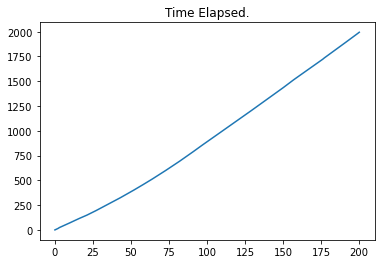

In [41]:
plt.plot(time_list, '-')
plt.title('Time Elapsed.')
plt.show()

In [42]:
time_list[-1] / len(time_list)

9.924038771966204

In [44]:
2000 * 200 / (3600 * 24)

4.62962962962963

Energy comparison.

In [16]:
energy_list = [result['energy'] for result in result_list]

In [25]:
from analytic_spin_half import energy_true

In [27]:
def energy_true(k, Jx=1, Jy=1, Jz=1):
    D = 1 if Jx*Jy <= 0 else -1
    cos_term = Jz + (Jx + D * Jy) * np.cos(k)
    sin_term = (Jx - D * Jy) * np.sin(k)
    return np.sqrt(cos_term**2 + sin_term**2)
def energy_average_true(Jx, Jy, Jz):
    return quad(lambda x:(energy_true(Jx=Jx, Jy=Jy, Jz=Jz, k=x) / (2 * np.pi)), 0, np.pi)

In [33]:
energy_true_list = [-energy_average_true(J, J, Jz)[0] for J in J_list]

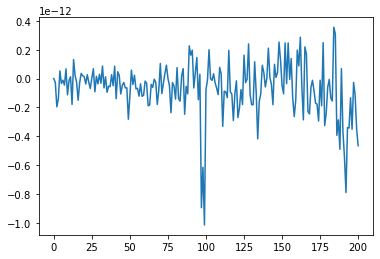

In [35]:
# plt.plot(energy_list)
plt.plot([energy_list[i] - energy_true_list[i] for i in range(201)])

## Read the file from DMRG

In [45]:
E_simu = np.loadtxt('Spin_half_snake1_L_2_chi_64_high_res/Energy.dat')

In [47]:
E_simu = E_simu*4

In [48]:
energy_simu_list = [E_simu[i, i] for i in range(201)]

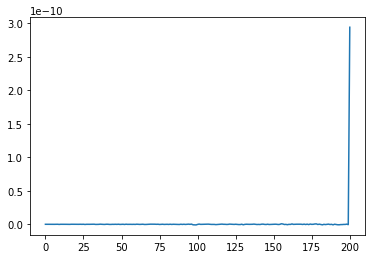

In [49]:
plt.plot([energy_simu_list[i] - energy_true_list[i] for i in range(201)])

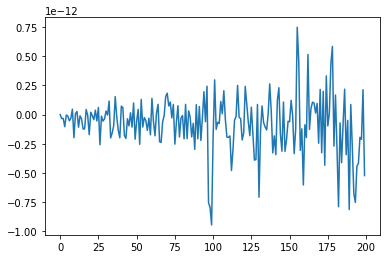

In [50]:
plt.plot([energy_simu_list[i] - energy_true_list[i] for i in range(200)])

So the result is: overall, starting from the 001 point will be much better.
 - The first point 001 will be much easier to obtain than 111 (or 221)
 - The first few points will be much better if an easier point is chosen initially.

In [53]:
psi_list = [result['psi'] for result in result_list]

In [60]:
xy_list = [psi.expectation_value_term([('Sigmay', 0), ('Sigmax', 1)]) for psi in psi_list]

In [61]:
xy_list

[array(0.),
 array(0.),
 array(2.47663401e-47),
 array(0.99955091),
 array(0.99920287),
 array(0.99875698),
 array(0.99821443),
 array(0.99757664),
 array(0.99684526),
 array(0.99602216),
 array(0.99510941),
 array(0.99410927),
 array(0.99302417),
 array(0.9918567),
 array(0.99060956),
 array(0.9892856),
 array(0.98788775),
 array(0.98641902),
 array(0.98488249),
 array(0.98328128),
 array(0.98161854),
 array(0.97989744),
 array(0.97812115),
 array(0.97629281),
 array(0.97441556),
 array(0.97249247),
 array(0.97052659),
 array(0.9685209),
 array(0.9664783),
 array(0.96440164),
 array(0.96229369),
 array(0.96015711),
 array(0.9579945),
 array(0.95580835),
 array(0.95360107),
 array(0.95137496),
 array(0.94913224),
 array(0.94687502),
 array(0.94460532),
 array(0.94232506),
 array(0.94003607),
 array(0.93774008),
 array(0.93543874),
 array(0.93313359),
 array(0.93082611),
 array(0.92851768),
 array(0.9262096),
 array(0.92390308),
 array(0.92159928),
 array(0.91929927),
 array(0.91700404)

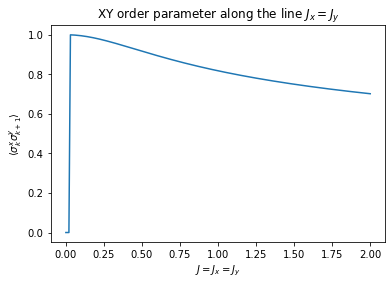

In [68]:
plt.plot(J_list,xy_list)
plt.title(r'XY order parameter along the line $J_x=J_y$')
plt.xlabel(r'$J=J_x=J_y$')
plt.ylabel(r'$\langle\sigma^x_k\sigma^y_{k+1}\rangle$')
plt.show()

## The sweep along the diagonal line $J_x+J_y = 2$

In [70]:
initial_psi = psi_list[100]

J_off_list = linspace(1.01, 2.00, 100)

result_off_list = [result_list[100]]
time_off_list = [0]

t0 = time.time()
for J in J_off_list:
    Jx = J
    Jy = 2 - J
    result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=2, initial_psi=initial_psi, chi=128, verbose=verbose)
    result_off_list.append(result)
    initial_psi = result['psi'].copy()
    time_off_list.append(time.time() - t0)

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.01 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.99 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=Tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.......
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8388550614167016, S = nan, norm_err = 2.1e-13
Current memory usage 313.4 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0416e-19, max_E_trunc = 3.6948e-13
MPS bond dimensions: [52, 58, 33, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8388550614166448, S = nan, norm_err = 1.1e-12
Current memory usage 313.4 MB, time elapsed: 8.5 s
Delta E = 5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1008e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [47, 56, 33, 58]
Convergence criterium reached wit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8389176976376937, S = nan, norm_err = 9.8e-13
Current memory usage 314.9 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3391e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [52, 58, 35, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8389176976376831, S = nan, norm_err = 7.7e-13
Current memory usage 314.9 MB, time elapsed: 8.3 s
Delta E = 1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1002e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [47, 54, 33, 55]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8390054666266238, S = nan, norm_err = 2.8e-13
Current memory usage 314.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6601e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [51, 58, 32, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8390054666265598, S = nan, norm_err = 2.1e-12
Current memory usage 314.9 MB, time elapsed: 7.9 s
Delta E = 6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0054e-19, max_E_trunc = 3.4106e-13
MPS bond dimensions: [46, 57, 34, 57]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8391184469634112, S = nan, norm_err = 3.2e-13
Current memory usage 314.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8488e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [51, 57, 33, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8391184469633757, S = nan, norm_err = 7.2e-13
Current memory usage 314.9 MB, time elapsed: 7.9 s
Delta E = 3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1457e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [46, 57, 34, 56]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8392567401110256, S = nan, norm_err = 3.8e-13
Current memory usage 314.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0645e-19, max_E_trunc = 1.9895e-13
MPS bond dimensions: [52, 58, 34, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8392567401111961, S = nan, norm_err = 2.3e-13
Current memory usage 314.9 MB, time elapsed: 7.9 s
Delta E = -1.7053e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0535e-19, max_E_trunc = 2.8422e-13
MPS bond dimensions: [47, 57, 35, 55]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8394204707448978, S = nan, norm_err = 4.0e-13
Current memory usage 314.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0148e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [52, 58, 36, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8394204707449830, S = nan, norm_err = 2.9e-13
Current memory usage 314.9 MB, time elapsed: 8.0 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1388e-19, max_E_trunc = 3.6948e-13
MPS bond dimensions: [45, 57, 36, 54]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8396097871590875, S = nan, norm_err = 4.8e-13
Current memory usage 314.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1159e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [52, 58, 35, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8396097871591834, S = nan, norm_err = 2.5e-13
Current memory usage 314.9 MB, time elapsed: 8.0 s
Delta E = -9.5923e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4231e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [46, 55, 33, 53]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8398248617560995, S = nan, norm_err = 2.5e-13
Current memory usage 314.9 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3338e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [52, 59, 32, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8398248617562345, S = nan, norm_err = 3.0e-13
Current memory usage 314.9 MB, time elapsed: 8.0 s
Delta E = -1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4236e-19, max_E_trunc = 4.5475e-13
MPS bond dimensions: [45, 59, 34, 59]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8400658916212684, S = nan, norm_err = 9.1e-13
Current memory usage 314.9 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4110e-19, max_E_trunc = 1.9895e-13
MPS bond dimensions: [52, 59, 34, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8400658916211654, S = nan, norm_err = 3.8e-13
Current memory usage 314.9 MB, time elapsed: 8.1 s
Delta E = 1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2024e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [47, 56, 38, 58]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8403330991886371, S = nan, norm_err = 8.6e-13
Current memory usage 315.4 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1097e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [53, 61, 35, 60]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8403330991885340, S = nan, norm_err = 4.2e-13
Current memory usage 315.4 MB, time elapsed: 8.2 s
Delta E = 1.0303e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1976e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [48, 57, 35, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8406267330042496, S = nan, norm_err = 7.9e-13
Current memory usage 316.4 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2756e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [52, 59, 36, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8406267330041999, S = nan, norm_err = 9.3e-13
Current memory usage 316.4 MB, time elapsed: 8.4 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2958e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [47, 58, 35, 58]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8409470685916709, S = nan, norm_err = 6.0e-13
Current memory usage 316.4 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5403e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [51, 60, 34, 61]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8409470685916887, S = nan, norm_err = 6.5e-13
Current memory usage 316.4 MB, time elapsed: 8.5 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.9791e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [48, 59, 35, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8412944094306596, S = nan, norm_err = 1.2e-12
Current memory usage 317.0 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3844e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [52, 61, 34, 61]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8412944094305459, S = nan, norm_err = 9.2e-13
Current memory usage 317.0 MB, time elapsed: 8.1 s
Delta E = 1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2520e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [47, 59, 37, 58]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8416690880554185, S = nan, norm_err = 7.7e-13
Current memory usage 317.7 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4304e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [55, 60, 35, 61]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8416690880553830, S = nan, norm_err = 6.3e-13
Current memory usage 317.7 MB, time elapsed: 8.4 s
Delta E = 3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0689e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [47, 59, 37, 61]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8420714672866758, S = nan, norm_err = 1.1e-12
Current memory usage 317.7 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3169e-19, max_E_trunc = 3.4106e-13
MPS bond dimensions: [55, 63, 37, 63]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8420714672867575, S = nan, norm_err = 1.1e-12
Current memory usage 317.7 MB, time elapsed: 8.2 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0763e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [50, 61, 37, 62]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8425019416059030, S = nan, norm_err = 1.8e-12
Current memory usage 319.0 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0697e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [54, 61, 35, 61]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8425019416059314, S = nan, norm_err = 7.2e-13
Current memory usage 319.0 MB, time elapsed: 8.7 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2308e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [50, 63, 39, 64]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8429609386911423, S = nan, norm_err = 2.7e-12
Current memory usage 319.0 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0702e-19, max_E_trunc = 1.9895e-13
MPS bond dimensions: [56, 64, 38, 66]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8429609386909860, S = nan, norm_err = 1.0e-12
Current memory usage 319.0 MB, time elapsed: 8.7 s
Delta E = 1.5632e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1151e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [53, 61, 34, 62]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8434489211261678, S = nan, norm_err = 4.7e-12
Current memory usage 319.3 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1605e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [56, 63, 41, 62]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8434489211260470, S = nan, norm_err = 1.0e-12
Current memory usage 319.3 MB, time elapsed: 8.8 s
Delta E = 1.2079e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7547e-20, max_E_trunc = 6.2528e-13
MPS bond dimensions: [50, 63, 38, 63]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8439663883085515, S = nan, norm_err = 8.0e-12
Current memory usage 320.7 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0994e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [55, 67, 42, 68]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8439663883084449, S = nan, norm_err = 1.5e-12
Current memory usage 320.7 MB, time elapsed: 9.1 s
Delta E = 1.0658e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1901e-19, max_E_trunc = 4.5475e-13
MPS bond dimensions: [51, 65, 38, 63]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8445138785741761, S = nan, norm_err = 1.5e-11
Current memory usage 320.7 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0332e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [57, 67, 40, 68]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8445138785743111, S = nan, norm_err = 7.8e-13
Current memory usage 320.7 MB, time elapsed: 9.1 s
Delta E = -1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2611e-19, max_E_trunc = 3.9790e-13
MPS bond dimensions: [54, 65, 41, 68]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8450919715695093, S = nan, norm_err = 2.9e-11
Current memory usage 322.4 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2173e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [56, 67, 39, 66]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8450919715695662, S = nan, norm_err = 6.9e-13
Current memory usage 322.4 MB, time elapsed: 9.2 s
Delta E = -5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2237e-19, max_E_trunc = 6.8212e-13
MPS bond dimensions: [53, 66, 40, 67]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8457012909012178, S = nan, norm_err = 5.6e-11
Current memory usage 322.5 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7008e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [59, 67, 38, 68]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8457012909012533, S = nan, norm_err = 1.2e-12
Current memory usage 322.5 MB, time elapsed: 9.1 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2495e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [55, 66, 39, 66]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8463425071015465, S = nan, norm_err = 1.0e-10
Current memory usage 322.9 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4700e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [54, 67, 38, 66]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8463425071015465, S = nan, norm_err = 1.3e-12
Current memory usage 322.9 MB, time elapsed: 9.3 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2594e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [53, 66, 38, 67]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8470163409545570, S = nan, norm_err = 1.9e-10
Current memory usage 324.1 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3366e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [56, 68, 40, 65]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8470163409545393, S = nan, norm_err = 8.5e-13
Current memory usage 324.2 MB, time elapsed: 9.5 s
Delta E = 1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4484e-19, max_E_trunc = 2.8422e-13
MPS bond dimensions: [53, 67, 41, 66]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8477235672362546, S = nan, norm_err = 3.6e-10
Current memory usage 325.8 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0315e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [56, 68, 39, 69]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8477235672361729, S = nan, norm_err = 3.3e-13
Current memory usage 325.8 MB, time elapsed: 10.3 s
Delta E = 8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5005e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [55, 68, 40, 67]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8484650189320746, S = nan, norm_err = 6.8e-10
Current memory usage 326.4 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1835e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [59, 68, 41, 67]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8484650189322949, S = nan, norm_err = 6.0e-13
Current memory usage 327.1 MB, time elapsed: 10.1 s
Delta E = -2.2027e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1879e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [56, 65, 41, 69]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8492415920123655, S = nan, norm_err = 1.3e-09
Current memory usage 328.0 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8005e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [61, 70, 40, 72]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8492415920125680, S = nan, norm_err = 3.5e-13
Current memory usage 328.0 MB, time elapsed: 10.1 s
Delta E = -2.0250e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1723e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [59, 65, 42, 70]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8500542508568998, S = nan, norm_err = 2.4e-09
Current memory usage 329.5 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2315e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [61, 70, 41, 70]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8500542508567861, S = nan, norm_err = 2.5e-13
Current memory usage 331.0 MB, time elapsed: 10.8 s
Delta E = 1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1325e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [59, 68, 42, 73]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8509040344472147, S = nan, norm_err = 4.5e-09
Current memory usage 331.0 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4457e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [61, 70, 41, 73]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8509040344471970, S = nan, norm_err = 4.6e-13
Current memory usage 332.8 MB, time elapsed: 11.1 s
Delta E = 1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0128e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [61, 67, 42, 76]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8517920634719260, S = nan, norm_err = 8.5e-09
Current memory usage 332.8 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7620e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [63, 75, 45, 78]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8517920634720824, S = nan, norm_err = 4.1e-13
Current memory usage 333.0 MB, time elapsed: 12.2 s
Delta E = -1.5632e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7988e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [60, 70, 41, 76]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [33, 46, 33, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-2.287381601627982e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.32 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.6799999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8536877996235077, S = nan, norm_err = 2.3e-08
Current memory usage 336.9 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2035e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [64, 72, 41, 76]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8536877996234864, S = nan, norm_err = 9.8e-13
Current memory usage 336.9 MB, time elapsed: 12.4 s
Delta E = 2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1986e-19, max_E_trunc = 2.8422e-13
MPS bond dimensions: [64, 70, 45, 80]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8546982373484937, S = nan, norm_err = 2.8e-08
Current memory usage 336.9 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1942e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [64, 74, 45, 76]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8546982373486287, S = nan, norm_err = 1.2e-12
Current memory usage 337.6 MB, time elapsed: 13.2 s
Delta E = -1.3500e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2884e-19, max_E_trunc = 4.2633e-13
MPS bond dimensions: [60, 71, 47, 80]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8557524059774479, S = nan, norm_err = 3.1e-08
Current memory usage 341.1 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1101e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [70, 77, 49, 75]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8557524059775901, S = nan, norm_err = 2.2e-12
Current memory usage 341.5 MB, time elapsed: 13.7 s
Delta E = -1.4211e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1900e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [65, 78, 49, 77]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8568519891243582, S = nan, norm_err = 3.5e-08
Current memory usage 342.5 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1871e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [72, 81, 48, 81]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8568519891244364, S = nan, norm_err = 4.3e-12
Current memory usage 343.6 MB, time elapsed: 13.9 s
Delta E = -7.8160e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4539e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [67, 80, 48, 81]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8579988285569726, S = nan, norm_err = 4.4e-08
Current memory usage 343.6 MB, time elapsed: 4.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4201e-19, max_E_trunc = 1.4211e-13
MPS bond dimensions: [72, 82, 50, 83]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8579988285571503, S = nan, norm_err = 9.9e-12
Current memory usage 347.0 MB, time elapsed: 14.9 s
Delta E = -1.7764e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6950e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [71, 82, 51, 87]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8591949471202298, S = nan, norm_err = 6.5e-08
Current memory usage 347.0 MB, time elapsed: 4.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5727e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [76, 87, 53, 86]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8591949471202440, S = nan, norm_err = 2.7e-11
Current memory usage 349.6 MB, time elapsed: 16.3 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6061e-19, max_E_trunc = 3.6948e-13
MPS bond dimensions: [69, 84, 52, 87]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8604425770554442, S = nan, norm_err = 1.1e-07
Current memory usage 349.6 MB, time elapsed: 5.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5400e-19, max_E_trunc = 3.6948e-13
MPS bond dimensions: [81, 89, 52, 90]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8604425770559843, S = nan, norm_err = 8.7e-11
Current memory usage 354.1 MB, time elapsed: 17.4 s
Delta E = -5.4001e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4992e-19, max_E_trunc = 4.2633e-13
MPS bond dimensions: [71, 87, 51, 90]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.8617441955736425, S = nan, norm_err = 2.2e-07
Current memory usage 354.1 MB, time elapsed: 5.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9991e-19, max_E_trunc = 2.5580e-13
MPS bond dimensions: [83, 88, 54, 95]
Updating environment
.....
sweep 20, age = 324
Energy = -0.8617441955756604, S = nan, norm_err = 3.1e-10
Current memory usage 357.5 MB, time elapsed: 18.3 s
Delta E = -2.0179e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7069e-19, max_E_trunc = 3.9790e-13
MPS bond dimensions: [74, 89, 55, 96]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [44, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999929+4.1935622654202237e-17j)
After the canonicalization:
Bond dim =  [44, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.41 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5900000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [44, 60, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-1.371847689699373e-16j)
After the canonicalization:
Bond dim =  [44, 60, 43, 59]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.42 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5800000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 59, 47, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-1.543664342113963e-16j)
After the canonicalization:
Bond dim =  [48, 59, 47, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.43 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5700000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 69, 50, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999973+7.87891849562474e-18j)
After the canonicalization:
Bond dim =  [49, 69, 50, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.44 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.56 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [57, 68, 56, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999918+1.9081958235744878e-17j)
After the canonicalization:
Bond dim =  [57, 68, 56, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.45 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.55 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 77, 56, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-8.054520378350408e-17j)
After the canonicalization:
Bond dim =  [56, 77, 56, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.46 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.54 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [64, 92, 64, 92]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+2.8693180104348764e-16j)
After the canonicalization:
Bond dim =  [64, 92, 64, 92]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.47 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.53 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [72, 92, 71, 92]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999956-4.579669976578771e-16j)
After the canonicalization:
Bond dim =  [72, 92, 71, 92]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.48 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.52 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [80, 113, 80, 113]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999951+4.4029835680462027e-16j)
After the canonicalization:
Bond dim =  [80, 113, 80, 113]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.49 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.51 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Init

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 50 sweeps.
total size = 724, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [95, 128, 95, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964-2.0339632755828063e-16j)
After the canonicalization:
Bond dim =  [95, 128, 95, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.5 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initia

Updating environment
.....
sweep 170, age = 2124
Energy = -0.8786453056093535, S = 0.9668637703917281, norm_err = 1.2e-04
Current memory usage 380.2 MB, time elapsed: 167.5 s
Delta E = -1.3953e-09, Delta S = 4.8029e-04 (per sweep)
max_trunc_err = 1.1296e-12, max_E_trunc = 1.9554e-11
MPS bond dimensions: [128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 2244
Energy = -0.8786453174017765, S = 0.9713934466584880, norm_err = 1.1e-04
Current memory usage 380.2 MB, time elapsed: 174.6 s
Delta E = -1.1792e-09, Delta S = 4.5297e-04 (per sweep)
max_trunc_err = 1.3040e-12, max_E_trunc = 2.1373e-11
MPS bond dimensions: [128, 128, 128, 128]
Updating environment
.....
sweep 190, age = 2364
Energy = -0.8786453274540236, S = 0.9756772780392915, norm_err = 1.1e-04
Current memory usage 380.2 MB, time elapsed: 180.1 s
Delta E = -1.0052e-09, Delta S = 4.2838e-04 (per sweep)
max_trunc_err = 1.4873e-12, max_E_trunc = 2.1146e-11
MPS bond dimensions: [128, 128, 128, 128]
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.21e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 2684, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128, 128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-2.1973266835859822e-16j)
After the canonicalization:
Bond dim =  [128, 128, 128, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.51 for config KitaevLadderSnakeC

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:416: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.86e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 1484, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [120, 128, 120, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038-2.0147168636049258e-16j)
After the canonicalization:
Bond dim =  [120, 128, 120, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.52 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.48 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [102, 128, 102, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971+1.045712995362269e-16j)
After the canonicalization:
Bond dim =  [102, 128, 102, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.53 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.47 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
I

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [86, 127, 86, 126]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1-2.5326962749261384e-16j)
After the canonicalization:
Bond dim =  [86, 127, 86, 126]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.54 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.45999999999999996 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initia

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [86, 114, 87, 114]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-1.6653345369377348e-16j)
After the canonicalization:
Bond dim =  [86, 114, 87, 114]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.55 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.44999999999999996 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 100, 66, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947-3.2612801348363973e-16j)
After the canonicalization:
Bond dim =  [66, 100, 66, 100]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.56 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.43999999999999995 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 90, 66, 89]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999953+6.938893903907228e-17j)
After the canonicalization:
Bond dim =  [66, 90, 66, 89]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.57 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.42999999999999994 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 86, 66, 85]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+1.6175164375456417e-16j)
After the canonicalization:
Bond dim =  [66, 86, 66, 85]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.58 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.41999999999999993 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRG

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [65, 78, 61, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+8.260333848401089e-17j)
After the canonicalization:
Bond dim =  [65, 78, 61, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.59 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.4099999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 76, 50, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-7.99513003446772e-18j)
After the canonicalization:
Bond dim =  [50, 76, 50, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.6 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3999999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 73, 50, 72]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+7.059373354661642e-18j)
After the canonicalization:
Bond dim =  [50, 73, 50, 72]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.61 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3899999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 67, 50, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000153+9.422141460390419e-17j)
After the canonicalization:
Bond dim =  [50, 67, 50, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.62 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3799999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-1.839377971548974e-16j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.63 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3700000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 62, 48, 63]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-1.4469104478696042e-17j)
After the canonicalization:
Bond dim =  [48, 62, 48, 63]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.64 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3600000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [39, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999949+1.1662743741772906e-16j)
After the canonicalization:
Bond dim =  [39, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.65 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3500000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006+1.4145074561579964e-16j)
After the canonicalization:
Bond dim =  [40, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.66 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3400000000000001 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-1.4072936952957812e-17j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.67 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.33000000000000007 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9328314208594186, S = nan, norm_err = 1.6e-09
Current memory usage 400.7 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3111e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [67, 75, 49, 77]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9328314208594222, S = nan, norm_err = 5.8e-13
Current memory usage 400.7 MB, time elapsed: 12.1 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6110e-19, max_E_trunc = 6.8212e-13
MPS bond dimensions: [67, 76, 49, 78]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9363954440369469, S = nan, norm_err = 7.6e-10
Current memory usage 401.8 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2208e-19, max_E_trunc = 1.1369e-13
MPS bond dimensions: [61, 74, 45, 77]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9363954440368971, S = nan, norm_err = 2.8e-13
Current memory usage 401.8 MB, time elapsed: 11.2 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2755e-19, max_E_trunc = 3.9790e-13
MPS bond dimensions: [63, 74, 48, 78]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9400028937026512, S = nan, norm_err = 3.5e-10
Current memory usage 401.8 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2511e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [63, 75, 45, 76]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9400028937027258, S = nan, norm_err = 2.2e-13
Current memory usage 401.8 MB, time elapsed: 10.7 s
Delta E = -7.4607e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0788e-19, max_E_trunc = 3.4106e-13
MPS bond dimensions: [68, 73, 49, 78]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9436524069522250, S = nan, norm_err = 1.6e-10
Current memory usage 401.8 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1534e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [60, 74, 44, 75]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9436524069522889, S = nan, norm_err = 2.8e-13
Current memory usage 401.8 MB, time elapsed: 10.4 s
Delta E = -6.3949e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8741e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [59, 68, 45, 78]
Convergence criterium reached

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9473426992481251, S = nan, norm_err = 7.0e-11
Current memory usage 401.8 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1908e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [58, 70, 43, 73]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9473426992482104, S = nan, norm_err = 7.2e-13
Current memory usage 401.8 MB, time elapsed: 9.6 s
Delta E = -8.5265e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3483e-19, max_E_trunc = 5.6843e-13
MPS bond dimensions: [63, 62, 44, 78]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9510725570919831, S = nan, norm_err = 3.2e-11
Current memory usage 401.8 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2908e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [54, 66, 38, 66]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9510725570921821, S = nan, norm_err = 1.1e-12
Current memory usage 401.8 MB, time elapsed: 9.2 s
Delta E = -1.9895e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3925e-19, max_E_trunc = 4.5475e-13
MPS bond dimensions: [51, 65, 39, 70]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9548408316725059, S = nan, norm_err = 1.4e-11
Current memory usage 401.8 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1836e-19, max_E_trunc = 1.7053e-13
MPS bond dimensions: [51, 58, 36, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9548408316725769, S = nan, norm_err = 2.0e-13
Current memory usage 401.8 MB, time elapsed: 9.0 s
Delta E = -7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7604e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [50, 57, 36, 58]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-1.5098483304667191e-16j)
After the canonicalization:
Bond dim =  [28, 43, 28, 43]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.75 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.25 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envir

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9624883266304884, S = nan, norm_err = 5.9e-12
Current memory usage 401.8 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0941e-19, max_E_trunc = 2.2737e-13
MPS bond dimensions: [50, 57, 33, 56]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9624883266303641, S = nan, norm_err = 2.9e-13
Current memory usage 401.8 MB, time elapsed: 8.7 s
Delta E = 1.2434e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0294e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [50, 58, 35, 56]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9663655261777819, S = nan, norm_err = 2.4e-12
Current memory usage 401.8 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8534e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [51, 56, 39, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9663655261776327, S = nan, norm_err = 2.8e-13
Current memory usage 401.8 MB, time elapsed: 8.6 s
Delta E = 1.4921e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1856e-19, max_E_trunc = 4.5475e-13
MPS bond dimensions: [48, 57, 34, 57]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9702770926832791, S = nan, norm_err = 2.8e-12
Current memory usage 401.8 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8337e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [52, 55, 38, 59]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9702770926832613, S = nan, norm_err = 2.3e-13
Current memory usage 401.8 MB, time elapsed: 8.4 s
Delta E = 1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6801e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [47, 49, 35, 58]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9742221296202018, S = nan, norm_err = 2.3e-12
Current memory usage 401.8 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3405e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [52, 56, 35, 57]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9742221296198821, S = nan, norm_err = 2.5e-13
Current memory usage 401.8 MB, time elapsed: 8.0 s
Delta E = 3.1974e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1230e-20, max_E_trunc = 5.6843e-13
MPS bond dimensions: [49, 51, 37, 59]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9781997801630737, S = nan, norm_err = 6.5e-13
Current memory usage 401.8 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0616e-19, max_E_trunc = 3.1264e-13
MPS bond dimensions: [52, 50, 36, 58]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9781997801630808, S = nan, norm_err = 2.1e-13
Current memory usage 401.8 MB, time elapsed: 7.6 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2567e-19, max_E_trunc = 3.9790e-13
MPS bond dimensions: [44, 51, 37, 58]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9822092244489937, S = nan, norm_err = 2.4e-12
Current memory usage 401.8 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0049e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [52, 50, 37, 53]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9822092244490861, S = nan, norm_err = 3.0e-13
Current memory usage 401.8 MB, time elapsed: 7.6 s
Delta E = -9.2371e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.9240e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [46, 48, 35, 55]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9862496771039240, S = nan, norm_err = 1.7e-12
Current memory usage 401.8 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6098e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [45, 48, 37, 53]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9862496771038849, S = nan, norm_err = 3.2e-13
Current memory usage 401.8 MB, time elapsed: 7.3 s
Delta E = 3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5807e-20, max_E_trunc = 5.6843e-13
MPS bond dimensions: [48, 48, 37, 55]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9903203850035212, S = nan, norm_err = 1.0e-12
Current memory usage 401.8 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2858e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [45, 47, 31, 48]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9903203850034714, S = nan, norm_err = 6.2e-14
Current memory usage 401.8 MB, time elapsed: 7.3 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3086e-20, max_E_trunc = 4.5475e-13
MPS bond dimensions: [43, 47, 35, 48]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9944206252389804, S = nan, norm_err = 1.8e-13
Current memory usage 401.8 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.4892e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [41, 42, 29, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9944206252390018, S = nan, norm_err = 1.4e-13
Current memory usage 401.8 MB, time elapsed: 6.9 s
Delta E = -2.1316e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9465e-20, max_E_trunc = 0.0000e+00
MPS bond dimensions: [38, 42, 28, 41]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -0.9985497032635280, S = nan, norm_err = 2.5e-13
Current memory usage 401.8 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2123e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [42, 42, 31, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -0.9985497032634143, S = nan, norm_err = 1.4e-13
Current memory usage 401.8 MB, time elapsed: 6.8 s
Delta E = 1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9057e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [44, 41, 31, 42]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0027069511977942, S = nan, norm_err = 1.7e-13
Current memory usage 401.8 MB, time elapsed: 2.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4223e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [39, 42, 30, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0027069511978652, S = nan, norm_err = 3.1e-13
Current memory usage 401.8 MB, time elapsed: 7.2 s
Delta E = -7.1054e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4374e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [39, 42, 32, 42]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0068917262791466, S = nan, norm_err = 3.0e-13
Current memory usage 401.8 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7726e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [40, 41, 28, 40]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0068917262790791, S = nan, norm_err = 1.3e-13
Current memory usage 401.8 MB, time elapsed: 6.7 s
Delta E = 6.7502e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8194e-20, max_E_trunc = 2.8422e-13
MPS bond dimensions: [40, 42, 26, 42]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0111034094349378, S = nan, norm_err = 3.7e-13
Current memory usage 401.8 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9104e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [43, 42, 30, 43]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0111034094348170, S = nan, norm_err = 2.3e-13
Current memory usage 401.8 MB, time elapsed: 6.9 s
Delta E = 1.2079e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2635e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [41, 39, 31, 40]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0153414039705844, S = nan, norm_err = 4.8e-13
Current memory usage 401.8 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2174e-20, max_E_trunc = 3.1264e-13
MPS bond dimensions: [41, 40, 30, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0153414039706945, S = nan, norm_err = 2.8e-13
Current memory usage 401.8 MB, time elapsed: 6.7 s
Delta E = -1.1013e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0174e-19, max_E_trunc = 0.0000e+00
MPS bond dimensions: [41, 41, 29, 40]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0196051343589652, S = nan, norm_err = 5.5e-13
Current memory usage 401.8 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5457e-20, max_E_trunc = 1.7053e-13
MPS bond dimensions: [42, 42, 29, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0196051343592032, S = nan, norm_err = 5.9e-13
Current memory usage 401.8 MB, time elapsed: 6.8 s
Delta E = -2.3803e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1774e-20, max_E_trunc = 5.6843e-13
MPS bond dimensions: [36, 39, 28, 42]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0238940451205636, S = nan, norm_err = 7.3e-13
Current memory usage 401.8 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5500e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [40, 39, 30, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0238940451206204, S = nan, norm_err = 7.4e-13
Current memory usage 401.8 MB, time elapsed: 6.6 s
Delta E = -5.6843e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6738e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [38, 39, 30, 42]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0282075997858122, S = nan, norm_err = 1.1e-12
Current memory usage 401.8 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4451e-20, max_E_trunc = 1.4211e-13
MPS bond dimensions: [38, 39, 29, 41]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0282075997857518, S = nan, norm_err = 4.2e-13
Current memory usage 401.8 MB, time elapsed: 6.5 s
Delta E = 6.0396e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0696e-20, max_E_trunc = 4.5475e-13
MPS bond dimensions: [39, 35, 27, 40]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0325452799326840, S = nan, norm_err = 6.8e-13
Current memory usage 401.8 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1895e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [35, 38, 26, 38]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0325452799327195, S = nan, norm_err = 4.2e-13
Current memory usage 401.8 MB, time elapsed: 6.5 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9417e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [36, 37, 26, 41]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0369065842912093, S = nan, norm_err = 1.2e-12
Current memory usage 401.8 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8853e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [31, 36, 22, 34]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0369065842912448, S = nan, norm_err = 4.1e-13
Current memory usage 401.8 MB, time elapsed: 6.4 s
Delta E = -3.5527e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8505e-20, max_E_trunc = 4.5475e-13
MPS bond dimensions: [31, 33, 22, 35]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0412910279095868, S = nan, norm_err = 8.4e-14
Current memory usage 401.8 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4047e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [26, 30, 25, 30]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0412910279094731, S = nan, norm_err = 3.9e-14
Current memory usage 401.8 MB, time elapsed: 6.3 s
Delta E = 1.1369e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5022e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [26, 31, 25, 30]
Convergence criterium reached wi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0456981413761710, S = nan, norm_err = 2.1e-13
Current memory usage 401.8 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4932e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [26, 30, 20, 27]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0456981413762918, S = nan, norm_err = 2.8e-14
Current memory usage 401.8 MB, time elapsed: 6.1 s
Delta E = -1.2079e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9585e-20, max_E_trunc = 4.5475e-13
MPS bond dimensions: [23, 30, 21, 27]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0501274700931233, S = nan, norm_err = 1.4e-13
Current memory usage 401.8 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0121e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [25, 28, 20, 29]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0501274700931518, S = nan, norm_err = 1.7e-14
Current memory usage 401.8 MB, time elapsed: 5.8 s
Delta E = -2.8422e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8614e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [24, 30, 20, 26]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0545785735948563, S = nan, norm_err = 1.2e-13
Current memory usage 401.8 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3871e-20, max_E_trunc = 2.5580e-13
MPS bond dimensions: [22, 29, 18, 28]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0545785735949451, S = nan, norm_err = 5.7e-14
Current memory usage 401.8 MB, time elapsed: 5.7 s
Delta E = -8.8818e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5113e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [25, 29, 19, 27]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0590510249120264, S = nan, norm_err = 7.7e-14
Current memory usage 401.8 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1546e-20, max_E_trunc = 2.2737e-13
MPS bond dimensions: [29, 29, 21, 27]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0590510249121081, S = nan, norm_err = 7.9e-14
Current memory usage 401.8 MB, time elapsed: 5.7 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5328e-20, max_E_trunc = 1.1369e-13
MPS bond dimensions: [27, 28, 22, 26]
Convergence criterium reached 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 204
Energy = -1.0635444099733675, S = nan, norm_err = 4.6e-13
Current memory usage 401.8 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5052e-20, max_E_trunc = 1.9895e-13
MPS bond dimensions: [16, 12, 16, 12]
Updating environment
.....
sweep 20, age = 324
Energy = -1.0635444099734173, S = nan, norm_err = 1.7e-14
Current memory usage 401.8 MB, time elapsed: 5.1 s
Delta E = -4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3460e-20, max_E_trunc = 3.4106e-13
MPS bond dimensions: [16, 12, 15, 14]
Convergence criterium reached w

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2334: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2179: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2355: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


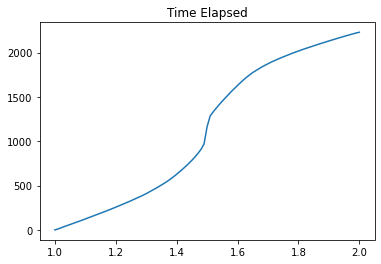

In [73]:
plt.plot([1.00]+J_off_list, time_off_list)
plt.title("Time Elapsed")
plt.show()

In [80]:
energy_off_list = np.array([result['energy'] for result in result_off_list])
energy_off_analytic_list = np.array([-energy_average_true(J, 2-J, 1)[0] for J in linspace(1, 2, 101)])

In [82]:
e_off_dif = energy_off_list - energy_off_analytic_list

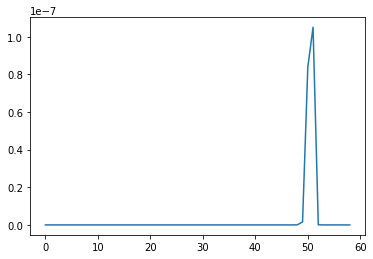

In [86]:
plt.plot(e_off_dif[0:59])

In [87]:
e_off_dif

array([-7.76045894e-14,  8.37108161e-14, -1.90514271e-13,  1.39888101e-14,
       -1.17905685e-13, -1.01696429e-13, -1.77413639e-13, -8.21565038e-14,
        1.54987134e-13, -8.39328607e-14, -9.76996262e-14, -1.13575815e-13,
       -1.59872116e-13, -2.64233080e-14, -2.05502282e-13,  1.68531855e-13,
       -3.29181127e-13, -7.01660952e-14, -2.72448730e-13, -9.79216708e-14,
       -2.31814568e-13, -2.63900013e-13, -2.46469511e-14, -1.57207580e-13,
       -1.38666856e-13,  8.99280650e-15, -2.30704345e-13,  6.21724894e-14,
       -8.43769499e-14,  1.25122135e-13, -5.95079541e-14, -9.43689571e-14,
       -1.25455202e-13,  2.90878432e-14, -1.77635684e-15, -1.39221967e-13,
       -8.49320614e-14,  5.32907052e-14,  3.33066907e-15, -2.25375274e-13,
       -1.18571819e-13,  6.10622664e-14, -2.07833750e-13, -2.43804976e-13,
       -1.87960758e-13, -2.38919995e-13, -1.72972747e-13, -3.22075699e-13,
        4.49198456e-11,  1.60371183e-09,  8.38190553e-08,  1.05027834e-07,
        8.17084178e-11,  

In [92]:
psi_off_list = [result['psi'] for result in result_off_list]
xy_off_list = [psi.expectation_value_term([('Sigmay', 0), ('Sigmax', 1)]) for psi in psi_off_list]

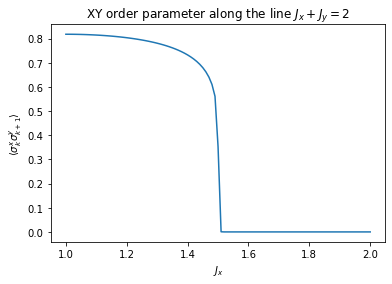

In [95]:
plt.plot([1.00]+J_off_list,xy_off_list)
plt.title(r'XY order parameter along the line $J_x+J_y=2$')
plt.xlabel(r'$J_x$')
plt.ylabel(r'$\langle\sigma^x_k\sigma^y_{k+1}\rangle$')
plt.show()

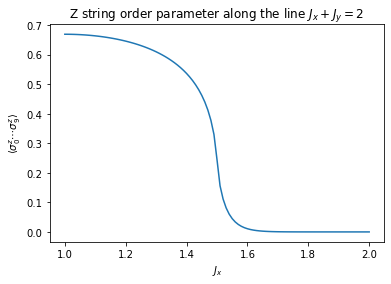

In [104]:
z_str_off_list = [psi.expectation_value_term([('Sigmaz', i) for i in range(50)]) for psi in psi_off_list]
plt.plot([1.00]+J_off_list,np.abs(z_str_off_list))
plt.title(r'Z string order parameter along the line $J_x+J_y=2$')
plt.xlabel(r'$J_x$')
plt.ylabel(r'$\langle\sigma^z_0 \cdots \sigma^z_{9}\rangle$')
plt.show()

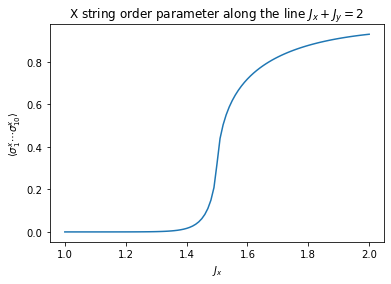

In [106]:
x_str_off_list = [psi.expectation_value_term([('Sigmax', i) for i in range(1, 51)]) for psi in psi_off_list]
plt.plot([1.00]+J_off_list,np.abs(x_str_off_list))
plt.title(r'X string order parameter along the line $J_x+J_y=2$')
plt.xlabel(r'$J_x$')
plt.ylabel(r'$\langle\sigma^x_1 \cdots \sigma^x_{10}\rangle$')
plt.show()

So, apparently the conclusions for both the string order parameter and the local order parameter are correct.